## 2nd Project | Trading

###  Instructions
- Follow a Python Project structure.
- Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
- Select n technical indicators (one for each team member).
- For each timeframe train/test files (1d, 1h, 5m, 1m):
    - Define buy/sell signals for each indicator.
    - Create all possible combinations of all technical indicators (2^n - 1).
    - Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    - Optimize all technical indicator's parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    - Select the optimal strategy and describe it thoroughly (what indicators are used, when is the trade signal produced, etc.).
    - Now, use the optimal strategy with the test dataset and compare it to a passive strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

data = pd.read_csv('data/aapl_5m_train.csv')

data = data.dropna()

rsi_data = ta.momentum.RSIIndicator(close = data.Close, window= 14)
data['RSI'] = rsi_data.rsi()

short_ma  = ta.trend.SMAIndicator(data.Close, window=5)
long_ma  = ta.trend.SMAIndicator(data.Close, window=21)
data["SHORT_SMA"] = short_ma.sma_indicator()
data["LONG_SMA"] = long_ma.sma_indicator()

macd = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()
data['Signal_Line'] = macd.macd_signal()

data['SAR'] = ta.trend.PSARIndicator(data['High'], data['Low'], data['Close'], step=0.02, max_step=0.2).psar()

adx_indicator = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14)
data['ADX'] = adx_indicator.adx()
data['+DI'] = adx_indicator.adx_pos()
data['-DI'] = adx_indicator.adx_neg()
data['prev_DI+'] = data['+DI'].shift(1)
data['prev_DI-'] = data['-DI'].shift(1)

data = data.dropna()

In [2]:
data.head()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,SHORT_SMA,LONG_SMA,MACD,Signal_Line,SAR,ADX,+DI,-DI,prev_DI+,prev_DI-
33,33,1609780500,0,2021-01-04 17:15:00,127.410003,128.029998,126.760002,128.005004,2891333.0,26.712155,128.233343,129.705785,-0.872535,-0.728380,128.770004,73.503071,3.365347,46.382888,3.964850,45.666999
34,34,1609780800,0,2021-01-04 17:20:00,128.000793,128.399993,127.750000,128.289993,1956101.0,31.714234,128.127340,129.571257,-0.856193,-0.753943,126.760002,73.269762,7.485484,42.814693,3.365347,46.382888
35,35,1609781100,0,2021-01-04 17:25:00,128.289993,128.320007,127.889999,128.250000,1331407.0,31.390449,128.061340,129.438161,-0.836823,-0.770519,126.760002,73.053118,7.096538,40.590038,7.485484,42.814693
36,36,1609781400,0,2021-01-04 17:30:00,128.246902,128.310104,127.910003,128.119995,1314757.0,30.307246,128.014999,129.312928,-0.822481,-0.780911,126.792802,72.851949,6.745340,38.581294,7.096538,40.590038
37,37,1609781700,0,2021-01-04 17:35:00,128.125000,128.210006,127.889999,127.955001,982464.0,28.942233,128.123999,129.181748,-0.815033,-0.787736,126.824946,72.677574,6.469565,37.259515,6.745340,38.581294


### RSI

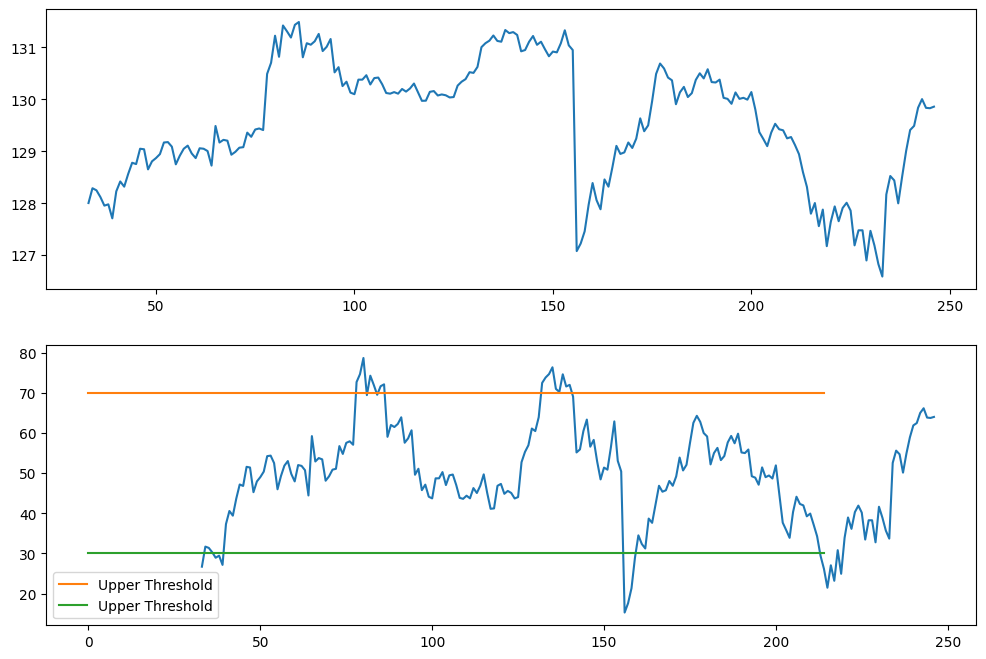

In [3]:
fig, axs = plt.subplots(2, 1, figsize = (12,8))


axs[0].plot(data.Close[:214])


axs[1].plot(data.RSI[:214])
axs[1].plot([0, 214], [70,70], label = "Upper Threshold")
axs[1].plot([0, 214], [30,30], label = "Upper Threshold")
plt.legend()

33 buy
37 buy
38 buy
39 buy
78 sell
79 sell
80 sell
82 sell
83 sell
85 sell
86 sell
132 sell
133 sell
134 sell
135 sell
136 sell
137 sell
138 sell
139 sell
140 sell
156 buy
157 buy
158 buy
159 buy
213 buy
214 buy
215 buy
216 buy
217 buy
219 buy
251 sell
252 sell
253 sell
304 sell
305 sell
306 sell
309 sell
312 sell
390 buy
391 buy
393 buy
394 buy
499 buy
500 buy
501 buy
502 buy
550 sell
560 sell
561 sell
565 sell
627 buy
628 buy
629 buy
630 buy
631 buy
693 buy
766 buy
767 buy
768 buy
769 buy
774 buy
775 buy
776 buy
778 buy
779 buy
858 sell
859 sell
860 sell
861 sell
862 sell
863 sell
864 sell
865 sell
866 sell
867 sell
868 sell
869 sell
870 sell
871 sell
872 sell
873 sell
874 sell
875 sell
876 sell
878 sell
879 sell
880 sell
881 sell
882 sell
883 sell
884 sell
885 sell
886 sell
887 sell
888 sell
889 sell
892 sell
936 sell
937 sell
938 sell
939 sell
940 sell
941 sell
942 sell
943 sell
944 sell
945 sell
946 sell
947 sell
948 sell
949 sell
950 sell
951 sell
952 sell
953 sell
954 sell
955 

8659 sell
8685 sell
8686 sell
8687 sell
8688 sell
8689 sell
8690 sell
8693 sell
8694 sell
8695 sell
8698 sell
8699 sell
8700 sell
8701 sell
8705 sell
8706 sell
8707 sell
8708 sell
8728 sell
8742 sell
8744 sell
8745 sell
8746 sell
8846 sell
8896 buy
8899 buy
8904 buy
8930 sell
8931 sell
8932 sell
8933 sell
8934 sell
8935 sell
8936 sell
8937 sell
8944 sell
8945 sell
8946 sell
8947 sell
8948 sell
9000 buy
9004 buy
9079 buy
9080 buy
9082 buy
9111 sell
9112 sell
9130 sell
9131 sell
9180 sell
9197 sell
9198 sell
9224 sell
9225 sell
9226 sell
9227 sell
9228 sell
9229 sell
9230 sell
9355 buy
9356 buy
9357 buy
9359 buy
9361 buy
9474 sell
9475 sell
9476 sell
9477 sell
9478 sell
9479 sell
9480 sell
9481 sell
9482 sell
9483 sell
9484 sell
9485 sell
9486 sell
9487 sell
9488 sell
9489 sell
9490 sell
9557 sell
9558 sell
9565 sell
9566 sell
9567 sell
9568 sell
9569 sell
9570 sell
9572 sell
9588 sell
9704 sell
9712 buy
9733 buy
9788 sell
9790 sell
9791 sell
9792 sell
9793 sell
9794 sell
9795 sell
9796 

15796 sell
15839 buy
15840 buy
15841 buy
15870 sell
15903 buy
15938 sell
15941 sell
15942 sell
15943 sell
15944 sell
15945 sell
15946 sell
15947 sell
15948 sell
15949 sell
15951 sell
15952 sell
15953 sell
15955 sell
16109 sell
16110 sell
16111 sell
16256 buy
16257 buy
16267 sell
16268 sell
16269 sell
16270 sell
16271 sell
16272 sell
16273 sell
16274 sell
16275 sell
16276 sell
16277 sell
16278 sell
16279 sell
16280 sell
16281 sell
16282 sell
16283 sell
16284 sell
16285 sell
16286 sell
16287 sell
16288 sell
16289 sell
16290 sell
16292 sell
16293 sell
16346 buy
16347 buy
16348 buy
16349 buy
16350 buy
16351 buy
16352 buy
16353 buy
16354 buy
16355 buy
16356 buy
16357 buy
16358 buy
16359 buy
16360 buy
16361 buy
16362 buy
16363 buy
16364 buy
16365 buy
16366 buy
16431 buy
16505 sell
16506 sell
16507 sell
16508 sell
16516 sell
16517 sell
16518 sell
16520 sell
16521 sell
16525 sell
16526 sell
16527 sell
16528 sell
16529 sell
16530 sell
16531 sell
16566 buy
16567 buy
16646 sell
16654 sell
16655 s

23681 sell
23682 sell
23683 sell
23684 sell
23726 sell
23727 sell
23730 sell
23733 sell
23736 sell
23737 sell
23738 sell
23739 sell
23740 sell
23741 sell
23742 sell
23745 sell
23746 sell
23747 sell
23748 sell
23749 sell
23751 sell
23753 sell
23791 buy
23792 buy
23796 buy
23813 sell
23892 sell
23958 sell
23960 sell
23961 sell
23962 sell
23963 sell
23964 sell
23965 sell
23966 sell
23968 sell
23974 sell
23975 sell
23996 sell
23997 sell
24052 sell
24053 sell
24054 sell
24058 sell
24059 sell
24060 sell
24061 sell
24062 sell
24063 sell
24064 sell
24065 sell
24066 sell
24067 sell
24068 sell
24069 sell
24070 sell
24071 sell
24072 sell
24073 sell
24074 sell
24075 sell
24139 sell
24140 sell
24151 sell
24152 sell
24153 sell
24154 sell
24155 sell
24156 sell
24157 sell
24159 sell
24160 sell
24161 sell
24174 sell
24175 sell
24277 sell
24280 sell
24281 sell
24282 sell
24285 sell
24286 sell
24287 sell
24293 sell
24432 sell
24433 sell
24440 sell
24441 sell
24445 sell
24447 sell
24448 sell
24449 sell
24

31162 buy
31210 buy
31213 buy
31214 buy
31245 buy
31289 buy
31290 buy
31292 buy
31321 sell
31324 sell
31325 sell
31326 sell
31327 sell
31328 sell
31329 sell
31330 sell
31331 sell
31338 sell
31339 sell
31340 sell
31341 sell
31342 sell
31345 sell
31346 sell
31347 sell
31348 sell
31349 sell
31356 sell
31357 sell
31358 sell
31359 sell
31360 sell
31361 sell
31362 sell
31363 sell
31364 sell
31377 sell
31478 buy
31501 buy
31557 sell
31558 sell
31559 sell
31560 sell
31561 sell
31562 sell
31563 sell
31564 sell
31590 buy
31715 sell
31716 sell
31717 sell
31718 sell
31719 sell
31720 sell
31792 sell
31794 sell
31795 sell
31796 sell
31797 sell
31798 sell
31799 sell
31800 sell
31801 sell
31802 sell
31803 sell
31806 sell
31895 sell
31979 sell
31980 sell
32094 buy
32095 buy
32113 sell
32114 sell
32115 sell
32116 sell
32117 sell
32154 sell
32165 sell
32166 sell
32170 sell
32171 sell
32268 buy
32269 buy
32270 buy
32272 buy
32275 buy
32276 buy
32278 buy
32279 buy
32280 buy
32281 buy
32282 buy
32283 buy
32

37905 sell
37906 sell
37907 sell
37908 sell
37909 sell
37910 sell
37911 sell
37912 sell
37913 sell
37914 sell
37915 sell
37916 sell
37917 sell
37918 sell
37920 sell
37921 sell
37922 sell
37923 sell
37924 sell
37925 sell
37999 buy
38000 buy
38001 buy
38002 buy
38003 buy
38005 buy
38065 sell
38066 sell
38067 sell
38068 sell
38078 sell
38079 sell
38080 sell
38081 sell
38082 sell
38132 buy
38162 buy
38163 buy
38164 buy
38165 buy
38166 buy
38168 buy
38169 buy
38170 buy
38171 buy
38172 buy
38173 buy
38174 buy
38175 buy
38176 buy
38212 buy
38213 buy
38214 buy
38215 buy
38216 buy
38217 buy
38218 buy
38219 buy
38220 buy
38239 buy
38240 buy
38241 buy
38315 sell
38323 sell
38411 sell
38412 sell
38423 sell
38424 sell
38425 sell
38426 sell
38467 buy
38468 buy
38469 buy
38470 buy
38471 buy
38473 buy
38474 buy
38475 buy
38488 buy
38535 sell
38536 sell
38537 sell
38538 sell
38539 sell
38540 sell
38541 sell
38542 sell
38543 sell
38544 sell
38545 sell
38546 sell
38550 sell
38552 sell
38553 sell
38554 se

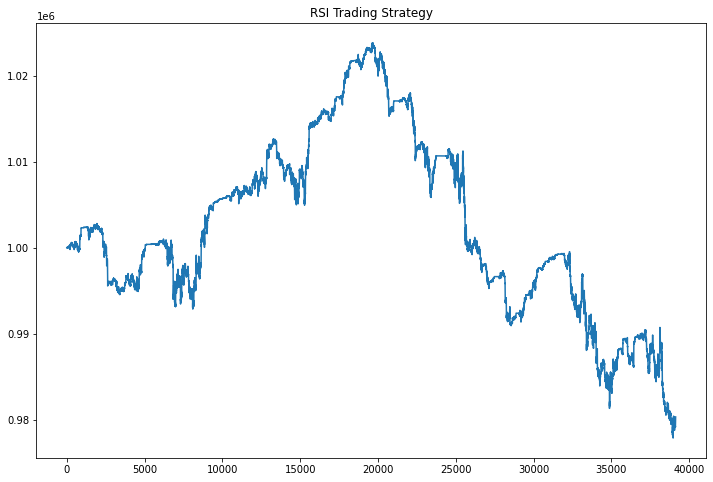

In [14]:
class Operation:
    def __init__(self, operation_type, bought_at, timestamp, n_shares, stop_loss, take_profit):
        self.operation_type = operation_type
        self.bought_at = bought_at
        self.timestamp = timestamp
        self.n_shares = n_shares
        self.sold_at = None
        self.stop_loss = stop_loss
        self.take_profit = take_profit

cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for i, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)  
        elif op.take_profit < row.Close: # Close profit
            cash += row.Close * op.n_shares *  (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    if cash > row.Close * n_shares * (1 + com):   
        # Buy signal
        if row.RSI < 30:
            active_operations.append(Operation(operation_type = 'long', 
                                               bought_at = row.Close, 
                                               timestamp = row.Timestamp, 
                                               n_shares = n_shares,
                                               stop_loss = row.Close * 0.95,
                                               take_profit = row.Close * 1.05))
            cash -= row.Close * n_shares *  (1 + com)
            print(i, "buy")
        elif row.RSI> 70:
            print(i, "sell")
    else:
        print('no money available..')
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)
        
        
plt.figure(figsize = (12, 8))
plt.plot(strategy_value)
plt.title('RSI Trading Strategy')
plt.show()

### SMA

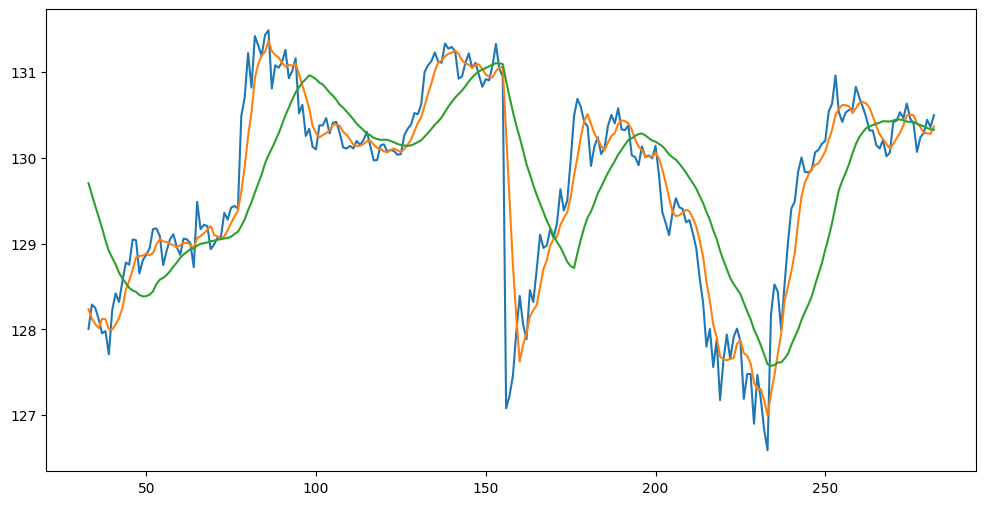

In [5]:
plt.figure(figsize = (12, 6))
plt.plot(data.Close[:250], label = 'price')
plt.plot(data.SHORT_SMA[:250], label = 'SAM(5)')
plt.plot(data.LONG_SMA[:250], label = 'SMA(21)')

45 buy
65 buy
127 buy
171 buy
236 buy
274 buy
282 buy
338 buy
371 buy
423 buy
436 buy
468 buy
481 buy
512 buy
537 buy
588 buy
609 buy
622 buy
639 buy
668 buy
704 buy
725 buy
749 buy
782 buy
806 buy
847 buy
858 buy
903 buy
918 buy
930 buy
966 buy
975 buy
1019 buy
1034 buy
1122 buy
1131 buy
1155 buy
1168 buy
1191 buy
1209 buy
1214 buy
1244 buy
1256 buy
1283 buy
1346 buy
1357 buy
1454 buy
1472 buy
1494 buy
1552 buy
1555 buy
1576 buy
1598 buy
1612 buy
1618 buy
1634 buy
1644 buy
1664 buy
1688 buy
1716 buy
1738 buy
1764 buy
1814 buy
1819 buy
1871 buy
1885 buy
1922 buy
1932 buy
1937 buy
2006 buy
2055 buy
2085 buy
2107 buy
2158 buy
2169 buy
2200 buy
2235 buy
2244 buy
2304 buy
2319 buy
2371 buy
2378 buy
2410 buy
2440 buy
2455 buy
2476 buy
2484 buy
2512 buy
2552 buy
2561 buy
2601 buy
2610 buy
2668 buy
2695 buy
2748 buy
2780 buy
2802 buy
2857 buy
2887 buy
2899 buy
2950 buy
2968 buy
3014 buy
3075 buy
3109 buy
3138 buy
3195 buy
3198 buy
3213 buy
3259 buy
3273 buy
3276 buy
3308 buy
3392 buy
3399 buy

28766 buy
28775 buy
28815 buy
28828 buy
28863 buy
28865 buy
28871 buy
28892 buy
28945 buy
28950 buy
28998 buy
29015 buy
29037 buy
29073 buy
29112 buy
29160 buy
29220 buy
29246 buy
29345 buy
29428 buy
29451 buy
29474 buy
29495 buy
29522 buy
29554 buy
29585 buy
29605 buy
29616 buy
29628 buy
29668 buy
29688 buy
29708 buy
29774 buy
29821 buy
29849 buy
29887 buy
29896 buy
29907 buy
29946 buy
29993 buy
30011 buy
30057 buy
30108 buy
30149 buy
30170 buy
30188 buy
30195 buy
30230 buy
30260 buy
30293 buy
30335 buy
30350 buy
30368 buy
30397 buy
30453 buy
30487 buy
30527 buy
30588 buy
30611 buy
30627 buy
30662 buy
30674 buy
30689 buy
30728 buy
30755 buy
30793 buy
30883 buy
30925 buy
30957 buy
30986 buy
31022 buy
31051 buy
31070 buy
31083 buy
31119 buy
31153 buy
31168 buy
31176 buy
31222 buy
31256 buy
31304 buy
31321 buy
31395 buy
31401 buy
31427 buy
31446 buy
31463 buy
31488 buy
31512 buy
31548 buy
31602 buy
31609 buy
31627 buy
31650 buy
31681 buy
31707 buy
31715 buy
31753 buy
31831 buy
31873 buy


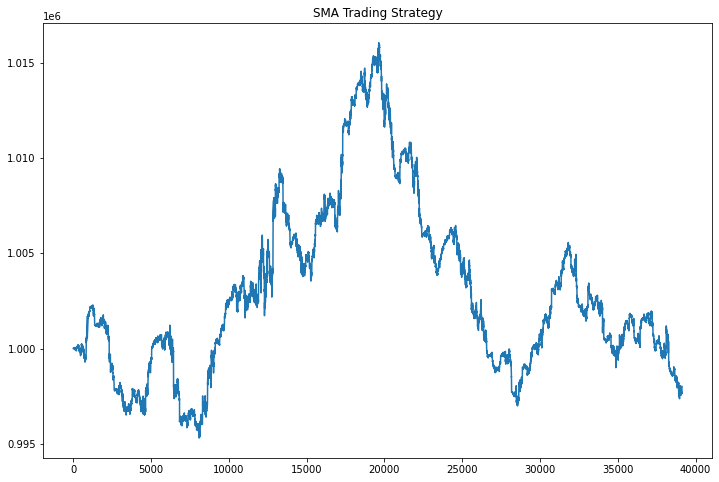

In [24]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

sma_sell_signal = data.iloc[0].LONG_SMA > data.iloc[0].SHORT_SMA 
sma_buy_signal = data.iloc[0].LONG_SMA < data.iloc[0].SHORT_SMA


for i, row in data.iterrows():
    # Close operations
    temp_operations = []
    for op in active_operations:
        # Close losing position
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)  
        elif op.take_profit < row.Close: # Close profit
            cash += row.Close * op.n_shares *  (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    if cash > row.Close * n_shares * (1 + com):   
        # Buy signal
        if (row.LONG_SMA < row.SHORT_SMA) and SMA_buy_signal == False:
            SMA_buy_signal =True
            #buy....
            active_operations.append(Operation(operation_type = 'long', 
                                               bought_at = row.Close, 
                                               timestamp = row.Timestamp, 
                                               n_shares = n_shares,
                                               stop_loss = row.Close * 0.95,
                                               take_profit = row.Close * 1.05))
            cash -= row.Close * n_shares *  (1 + com)
            print(i, "buy")
            
        elif row.LONG_SMA > row.SHORT_SMA:
            SMA_buy_signal =False
        
            
    else:
        print('no money available..')
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)
    
    
plt.figure(figsize = (12, 8))
plt.plot(strategy_value)
plt.title('SMA Trading Strategy')
plt.show()

### MACD

In [7]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data.tail()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,...,LONG_SMA,MACD,Signal_Line,SAR,ADX,+DI,-DI,prev_DI+,prev_DI-,Signal line
39573,19787,1672432500,0,2022-12-30 20:35:00,129.020004,129.050003,128.899993,129.039993,773964.0,65.879195,...,128.464853,0.137293,0.045704,128.391187,28.525374,26.848508,11.804718,28.146415,12.375380,0.045704
39574,19788,1672432800,0,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,833767.0,66.256388,...,128.497233,0.151129,0.066789,128.454292,29.547598,27.579529,11.037387,26.848508,11.804718,0.066789
39575,19789,1672433100,0,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,2136910.0,73.176111,...,128.556762,0.186174,0.090666,128.512348,31.268525,32.466832,9.796526,27.579529,11.037387,0.090666
39576,19790,1672433400,0,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,2879267.0,78.731380,...,128.636019,0.242174,0.120968,128.601112,33.811895,41.432915,8.224302,32.466832,9.796526,0.120968
39577,19791,1672433700,0,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,3896812.0,80.798987,...,128.721738,0.298093,0.156393,128.760578,36.200736,38.362421,7.510367,41.432915,8.224302,0.156393


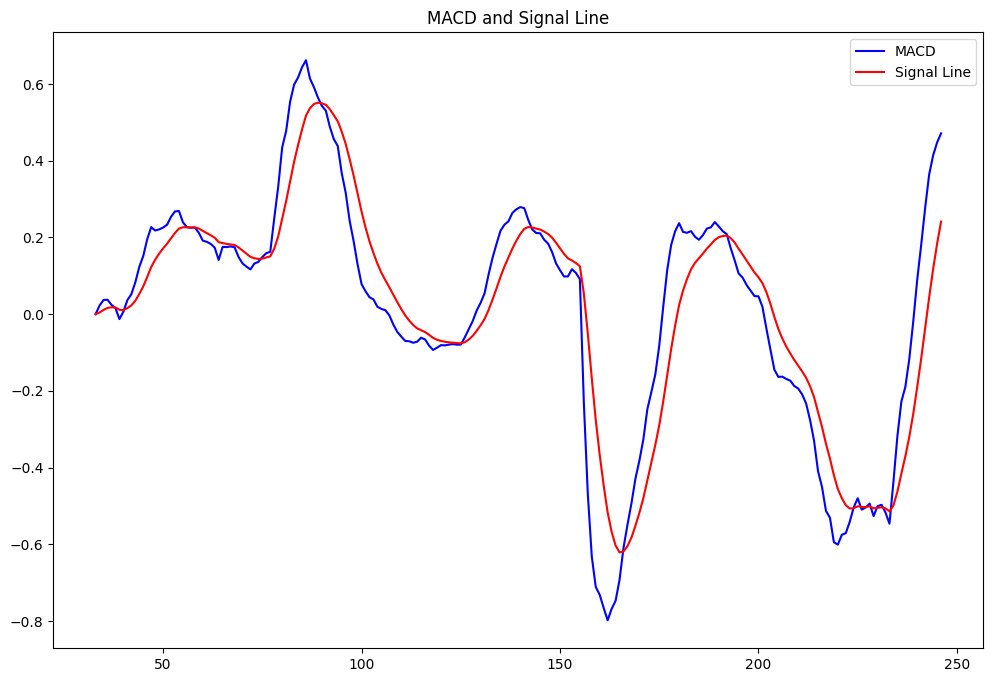

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# Graficar el MACD
plt.plot(data.index[:214], data['MACD'][:214], label='MACD', color='blue')

# Graficar la línea de señal
plt.plot(data.index[:214], data['Signal line'][:214], label='Signal Line', color='red')

# Añadir un título y una leyenda
plt.title('MACD and Signal Line')
plt.legend()

plt.show()


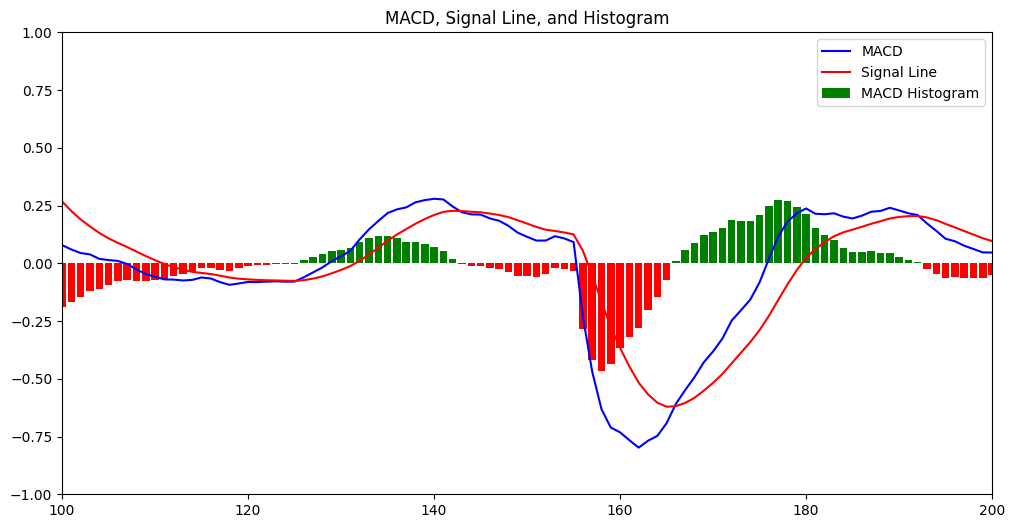

In [18]:
data['MACD_Histogram'] = data['MACD'] - data['Signal line']

plt.figure(figsize=(12, 6))

# Graficar el MACD y la línea de señal
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal line'], label='Signal Line', color='red')

# Rellenar el histograma entre el MACD y la línea de señal
# Usaremos un color diferente dependiendo si el histograma es positivo o negativo
plt.bar(data.index, data['MACD_Histogram'], label='MACD Histogram', color=['green' if val >= 0 else 'red' for val in data['MACD_Histogram']])

# Añadir un título y una leyenda
plt.title('MACD, Signal Line, and Histogram')
plt.legend()
plt.xlim(100,200)
plt.ylim(-1,1)
plt.show()


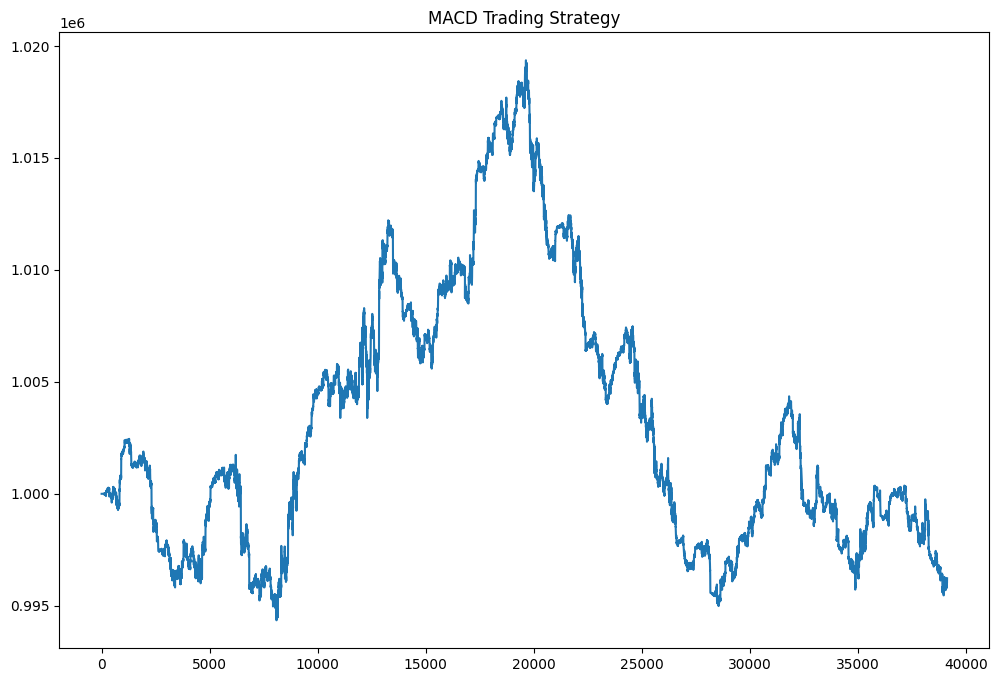

In [12]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for i, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close: 
            cash += row.Close * op.n_shares * (1 - com)
        elif op.take_profit < row.Close:  
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations
    
    # Verificamos si tenemos suficiente efectivo
    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra: la línea MACD cruza por encima de la línea de señal
        prev_macd = data['MACD'].shift(1)[i]  # Valor MACD de la fila anterior
        prev_signal = data['Signal_Line'].shift(1)[i]  # Valor de la línea de señal de la fila anterior
        if row['MACD'] > row['Signal_Line'] and prev_macd < prev_signal:
            active_operations.append(Operation(operation_type='long',
                                                bought_at=row.Close,
                                                timestamp=row.Timestamp,
                                                n_shares=n_shares,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.05))
            cash -= row.Close * n_shares * (1 + com)
    else:
        print('no money available..')
    
    
    total_value = len(active_operations) * row.Close * n_shares
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('MACD Trading Strategy')
plt.show()

### SAR

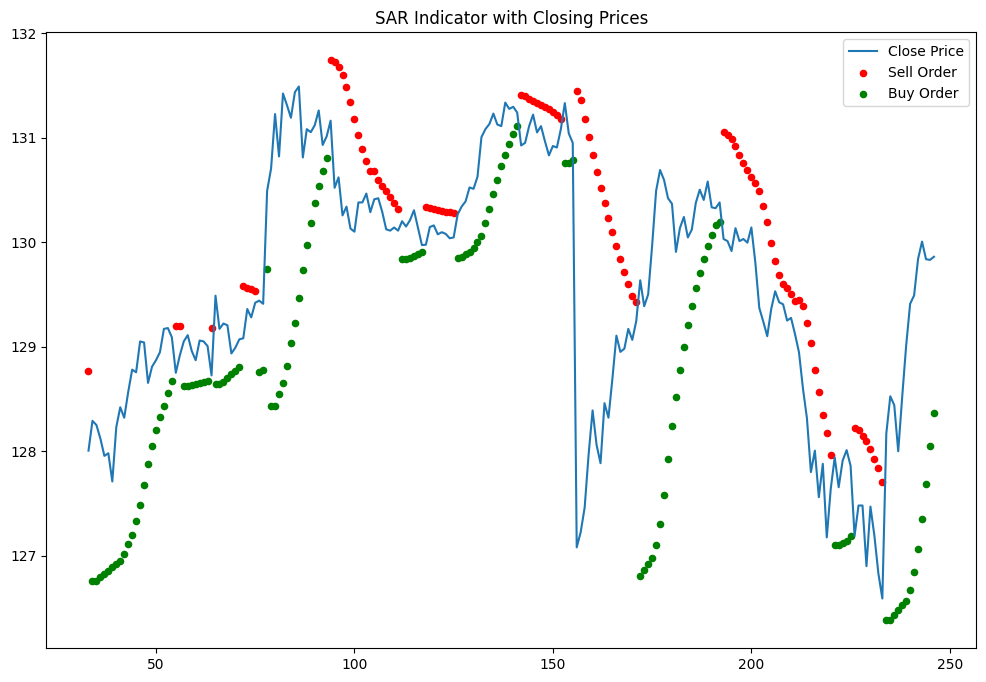

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(data.Close.iloc[:214], label='Close Price')

legend_added_buy = False
legend_added_sell = False

for i in range(214):
    if data.SAR.iloc[i] < data.Close.iloc[i]:
        color = 'green'
        label = 'Buy Order' if not legend_added_buy else None  
        legend_added_buy = True
    else:
        color = 'red'
        label = 'Sell Order' if not legend_added_sell else None  
        legend_added_sell = True
    
    plt.scatter(data.index[i], data.SAR.iloc[i], color=color, s=20, label=label)

if not legend_added_buy:
    plt.scatter([], [], color='green', s=20, label='Buy Order')
if not legend_added_sell:
    plt.scatter([], [], color='red', s=20, label='Sell Order')

plt.title('SAR Indicator with Closing Prices')
plt.legend()
plt.show()

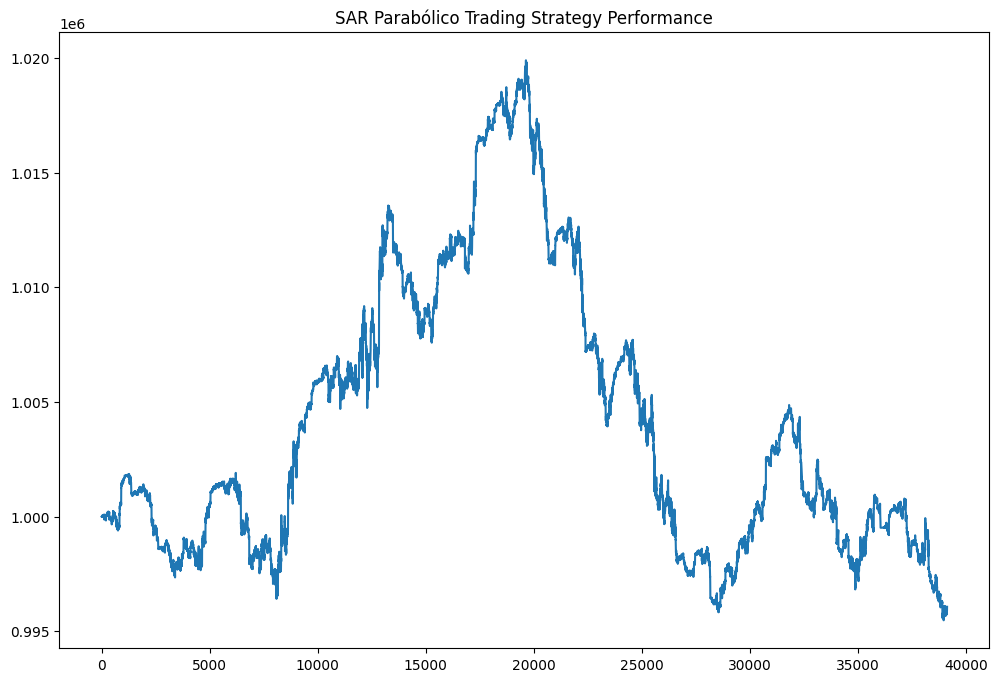

In [14]:
cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10
data['prev_SAR'] = data['SAR'].shift(1)

for index, row in data.iterrows():

    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close or op.take_profit < row.Close:
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations

    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra: puntos del SAR pasan de estar arriba a debajo del precio
        if pd.notnull(row['prev_SAR']):  # Asegura que el valor previo de SAR no sea NaN
            if row['SAR'] < row['Close'] and row['prev_SAR'] > row['Close']:
                active_operations.append(Operation('long', row.Close, row.Timestamp, n_shares, row.Close * 0.95, row.Close * 1.05))
                cash -= row.Close * n_shares * (1 + com)

    
    total_value = sum(op.n_shares * row.Close for op in active_operations)
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('SAR Parabólico Trading Strategy Performance')
plt.show()

### ADX

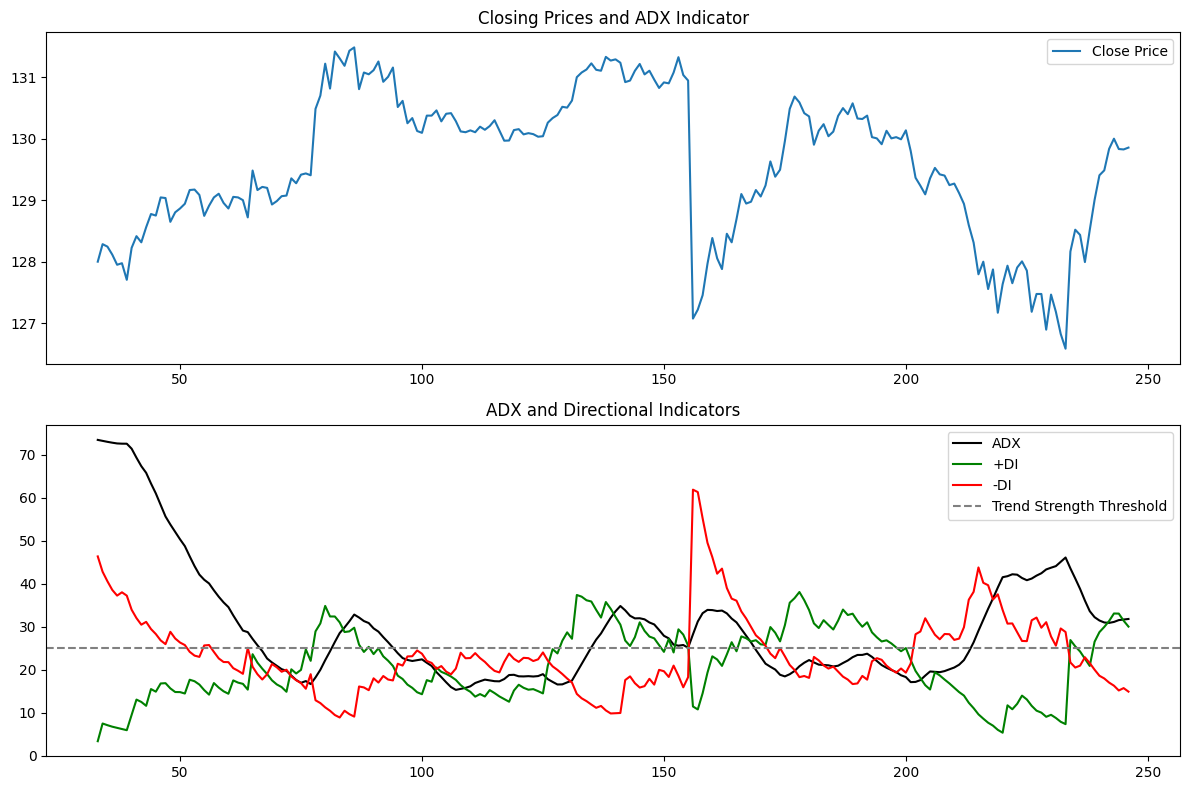

In [15]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(data.Close.iloc[:214], label='Close Price')
ax1.set_title('Closing Prices and ADX Indicator')
ax1.legend()

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(data['ADX'].iloc[:214], label='ADX', color='black')
ax2.plot(data['+DI'].iloc[:214], label='+DI', color='green')
ax2.plot(data['-DI'].iloc[:214], label='-DI', color='red')

ax2.axhline(25, color='gray', linestyle='--', label = 'Trend Strength Threshold')

ax2.set_title('ADX and Directional Indicators')
ax2.legend()

plt.tight_layout()
plt.show()

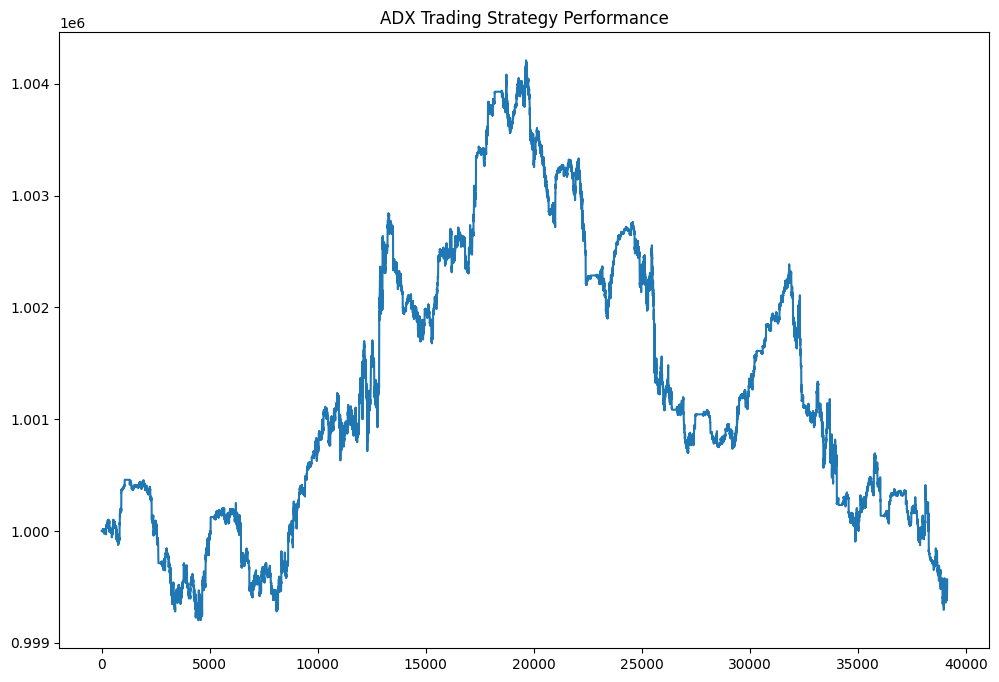

In [16]:
data = data.dropna()

cash = 1_000_000
active_operations = []
com = 0.00125
strategy_value = [1_000_000]
n_shares = 10

for index, row in data.iterrows():
    temp_operations = []
    for op in active_operations:
        if op.stop_loss > row.Close or op.take_profit < row.Close:
            cash += row.Close * op.n_shares * (1 - com)
        else:
            temp_operations.append(op)
    active_operations = temp_operations

    if cash > row.Close * n_shares * (1 + com):
        # Señal de compra
        if pd.notnull(row['prev_DI+']) and pd.notnull(row['prev_DI-']):  # Verifica que los valores previos no sean NaN
            if row['+DI'] > row['-DI'] and row['ADX'] > 25 and row['prev_DI+'] < row['prev_DI-']:
                active_operations.append(Operation('long', row.Close, row.Timestamp, n_shares, row.Close * 0.95, row.Close * 1.05))
                cash -= row.Close * n_shares * (1 + com)


    total_value = sum(op.n_shares * row.Close for op in active_operations)
    strategy_value.append(cash + total_value)


plt.figure(figsize=(12, 8))
plt.plot(strategy_value)
plt.title('ADX Trading Strategy Performance')
plt.show()

In [1]:
from technical_analysis import Operation, TradingStrategy

In [2]:
strategy = TradingStrategy('5m')


In [3]:
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['RSI']
Ejecutando con combinación de indicadores: ['SMA']
Ejecutando con combinación de indicadores: ['MACD']
Ejecutando con combinación de indicadores: ['SAR']
Ejecutando con combinación de indicadores: ['ADX']
Ejecutando con combinación de indicadores: ['Stoch']
Ejecutando con combinación de indicadores: ['RSI', 'SMA']
Ejecutando con combinación de indicadores: ['RSI', 'MACD']
Ejecutando con combinación de indicadores: ['RSI', 'SAR']
Ejecutando con combinación de indicadores: ['RSI', 'ADX']
Ejecutando con combinación de indicadores: ['RSI', 'Stoch']
Ejecutando con combinación de indicadores: ['SMA', 'MACD']
Ejecutando con combinación de indicadores: ['SMA', 'SAR']
Ejecutando con combinación de indicadores: ['SMA', 'ADX']
Ejecutando con combinación de indicadores: ['SMA', 'Stoch']
Ejecutando con combinación de indicadores: ['MACD', 'SAR']
Ejecutando con combinación de indicadores: ['MACD', 'ADX']
Ejecutando con combinación de indicadores: ['

In [4]:
print(f"La mejor combinación de indicadores es: {strategy.best_combination} con un valor de estrategia de: {strategy.best_value}")

La mejor combinación de indicadores es: ['SAR', 'ADX'] con un valor de estrategia de: 1003332.0280264126


In [3]:
strategy.execute_trades()

Fila: 0, Valor de la estrategia: 1000000
Fila: 1, Valor de la estrategia: 1000000
Fila: 2, Valor de la estrategia: 1000000
Fila: 3, Valor de la estrategia: 1000000
Fila: 4, Valor de la estrategia: 1000000
Fila: 5, Valor de la estrategia: 1000000
Fila: 6, Valor de la estrategia: 1000000
Fila: 7, Valor de la estrategia: 1000000
Fila: 8, Valor de la estrategia: 1000000
Fila: 9, Valor de la estrategia: 1000000
Fila: 10, Valor de la estrategia: 1000000
Fila: 11, Valor de la estrategia: 1000000
Fila: 12, Valor de la estrategia: 1000000
Fila: 13, Valor de la estrategia: 1000000
Fila: 14, Valor de la estrategia: 1000000
Fila: 15, Valor de la estrategia: 1000000
Fila: 16, Valor de la estrategia: 1000000
Fila: 17, Valor de la estrategia: 1000000
Fila: 18, Valor de la estrategia: 1000000
Fila: 19, Valor de la estrategia: 1000000
Fila: 20, Valor de la estrategia: 1000000
Fila: 21, Valor de la estrategia: 1000000
Fila: 22, Valor de la estrategia: 1000000
Fila: 23, Valor de la estrategia: 1000000
Fi

Fila: 935, Valor de la estrategia: 1028799.6611827875
Fila: 936, Valor de la estrategia: 1028816.9527427874
Fila: 937, Valor de la estrategia: 1028753.3960627875
Fila: 938, Valor de la estrategia: 1028717.9298627875
Fila: 939, Valor de la estrategia: 1028738.7227227875
Fila: 940, Valor de la estrategia: 1028693.7298627875
Fila: 941, Valor de la estrategia: 1028668.4320627875
Fila: 942, Valor de la estrategia: 1028645.1785027875
Fila: 943, Valor de la estrategia: 1028700.3329427874
Fila: 944, Valor de la estrategia: 1028648.6327227874
Fila: 945, Valor de la estrategia: 1028645.3329427874
Fila: 946, Valor de la estrategia: 1028621.1327227874
Fila: 947, Valor de la estrategia: 1028627.8869427874
Fila: 948, Valor de la estrategia: 1028632.1300827875
Fila: 949, Valor de la estrategia: 1028645.1785027875
Fila: 950, Valor de la estrategia: 1028636.5309627875
Fila: 951, Valor de la estrategia: 1028658.5322827875
Fila: 952, Valor de la estrategia: 1028631.0322827875
Fila: 953, Valor de la estra

Fila: 1765, Valor de la estrategia: 992020.3960671122
Fila: 1766, Valor de la estrategia: 992005.3959171122
Fila: 1767, Valor de la estrategia: 992013.1458671122
Fila: 1768, Valor de la estrategia: 992007.3963671122
Fila: 1769, Valor de la estrategia: 991999.2107671122
Fila: 1770, Valor de la estrategia: 991985.8959671122
Fila: 1771, Valor de la estrategia: 991984.3960171122
Fila: 1772, Valor de la estrategia: 991998.8956671122
Fila: 1773, Valor de la estrategia: 991986.3712671122
Fila: 1774, Valor de la estrategia: 991988.8958171122
Fila: 1775, Valor de la estrategia: 991992.9012671122
Fila: 1776, Valor de la estrategia: 991998.9307671122
Fila: 1777, Valor de la estrategia: 992002.6463171123
Fila: 1778, Valor de la estrategia: 992002.3960671122
Fila: 1779, Valor de la estrategia: 992006.3961671122
Fila: 1780, Valor de la estrategia: 992006.3206171122
Fila: 1781, Valor de la estrategia: 991996.9013671122
Fila: 1782, Valor de la estrategia: 991994.8963671122
Fila: 1783, Valor de la estr

Fila: 2578, Valor de la estrategia: 986609.0101457246
Fila: 2579, Valor de la estrategia: 986609.6398757247
Fila: 2580, Valor de la estrategia: 986600.9194157246
Fila: 2581, Valor de la estrategia: 986622.4471457247
Fila: 2582, Valor de la estrategia: 986628.5404157246
Fila: 2583, Valor de la estrategia: 986612.6823257246
Fila: 2584, Valor de la estrategia: 986609.9104157246
Fila: 2585, Valor de la estrategia: 986612.6102357246
Fila: 2586, Valor de la estrategia: 986612.6102357246
Fila: 2587, Valor de la estrategia: 986630.1602357246
Fila: 2588, Valor de la estrategia: 986628.8103257247
Fila: 2589, Valor de la estrategia: 986639.6098757247
Fila: 2590, Valor de la estrategia: 986656.7100557246
Fila: 2591, Valor de la estrategia: 986661.1739657247
Fila: 2592, Valor de la estrategia: 986655.3601457246
Fila: 2593, Valor de la estrategia: 986679.2100557246
Fila: 2594, Valor de la estrategia: 986673.8103257247
Fila: 2595, Valor de la estrategia: 986662.2904157246
Fila: 2596, Valor de la estr

Fila: 3613, Valor de la estrategia: 1000116.9652518749
Fila: 3614, Valor de la estrategia: 1000118.4651918749
Fila: 3615, Valor de la estrategia: 1000118.8651118749
Fila: 3616, Valor de la estrategia: 1000119.5651918749
Fila: 3617, Valor de la estrategia: 1000116.4632318749
Fila: 3618, Valor de la estrategia: 1000118.8791518749
Fila: 3619, Valor de la estrategia: 1000118.2651518749
Fila: 3620, Valor de la estrategia: 1000118.3652518749
Fila: 3621, Valor de la estrategia: 1000115.0632318748
Fila: 3622, Valor de la estrategia: 1000112.8632318749
Fila: 3623, Valor de la estrategia: 1000115.2471118749
Fila: 3624, Valor de la estrategia: 1000113.4651918749
Fila: 3625, Valor de la estrategia: 1000112.9651518749
Fila: 3626, Valor de la estrategia: 1000111.4652118749
Fila: 3627, Valor de la estrategia: 1000114.6651318748
Fila: 3628, Valor de la estrategia: 1000112.8671918749
Fila: 3629, Valor de la estrategia: 1000115.0652318749
Fila: 3630, Valor de la estrategia: 1000116.5651718748
Fila: 3631

Fila: 4253, Valor de la estrategia: 1009238.0008084872
Fila: 4254, Valor de la estrategia: 1009238.1628084872
Fila: 4255, Valor de la estrategia: 1009228.2628084872
Fila: 4256, Valor de la estrategia: 1009235.0125384872
Fila: 4257, Valor de la estrategia: 1009261.2931684871
Fila: 4258, Valor de la estrategia: 1009267.8719884872
Fila: 4259, Valor de la estrategia: 1009276.0348084872
Fila: 4260, Valor de la estrategia: 1009311.5130784871
Fila: 4261, Valor de la estrategia: 1009294.1787184872
Fila: 4262, Valor de la estrategia: 1009316.4630784872
Fila: 4263, Valor de la estrategia: 1008091.1413959747
Fila: 4264, Valor de la estrategia: 1008076.7974759747
Fila: 4265, Valor de la estrategia: 1008100.2453959747
Fila: 4266, Valor de la estrategia: 1008133.0615559747
Fila: 4267, Valor de la estrategia: 1006911.7259610248
Fila: 4268, Valor de la estrategia: 1006898.4327510247
Fila: 4269, Valor de la estrategia: 1006905.4256810247
Fila: 4270, Valor de la estrategia: 1006894.2184710247
Fila: 4271

Fila: 4893, Valor de la estrategia: 1016416.1039759873
Fila: 4894, Valor de la estrategia: 1016423.5885259872
Fila: 4895, Valor de la estrategia: 1016399.6039759873
Fila: 4896, Valor de la estrategia: 1016389.8535259872
Fila: 4897, Valor de la estrategia: 1016353.1042759873
Fila: 4898, Valor de la estrategia: 1016356.5238259872
Fila: 4899, Valor de la estrategia: 1016341.1039759873
Fila: 4900, Valor de la estrategia: 1016334.3542759873
Fila: 4901, Valor de la estrategia: 1016293.1041259873
Fila: 4902, Valor de la estrategia: 1016300.3791259873
Fila: 4903, Valor de la estrategia: 1016326.1042759873
Fila: 4904, Valor de la estrategia: 1016311.1182259873
Fila: 4905, Valor de la estrategia: 1016320.7792759873
Fila: 4906, Valor de la estrategia: 1016318.7388259872
Fila: 4907, Valor de la estrategia: 1016302.1036759872
Fila: 4908, Valor de la estrategia: 1016327.6492759873
Fila: 4909, Valor de la estrategia: 1016318.1838259873
Fila: 4910, Valor de la estrategia: 1016303.5891259873
Fila: 4911

Fila: 5579, Valor de la estrategia: 1008901.4963663877
Fila: 5580, Valor de la estrategia: 1008902.3958263877
Fila: 5581, Valor de la estrategia: 1008891.1458263877
Fila: 5582, Valor de la estrategia: 1008886.6469963877
Fila: 5583, Valor de la estrategia: 1008856.4963663877
Fila: 5584, Valor de la estrategia: 1010182.5581513126
Fila: 5585, Valor de la estrategia: 1010131.9386513127
Fila: 5586, Valor de la estrategia: 1011500.0851588127
Fila: 5587, Valor de la estrategia: 1011492.0335988126
Fila: 5588, Valor de la estrategia: 1011477.7984988127
Fila: 5589, Valor de la estrategia: 1011496.4999288127
Fila: 5590, Valor de la estrategia: 1011542.6997088126
Fila: 5591, Valor de la estrategia: 1011543.7991588127
Fila: 5592, Valor de la estrategia: 1011556.9884888127
Fila: 5593, Valor de la estrategia: 1011542.0619288126
Fila: 5594, Valor de la estrategia: 1011521.7994888127
Fila: 5595, Valor de la estrategia: 1011482.1993788127
Fila: 5596, Valor de la estrategia: 1011508.6000388127
Fila: 5597

Fila: 6226, Valor de la estrategia: 1007709.3147091627
Fila: 6227, Valor de la estrategia: 1007693.6664691627
Fila: 6228, Valor de la estrategia: 1007710.0666291626
Fila: 6229, Valor de la estrategia: 1007700.0336691627
Fila: 6230, Valor de la estrategia: 1007685.2497491627
Fila: 6231, Valor de la estrategia: 1007724.4745491627
Fila: 6232, Valor de la estrategia: 1007745.8027091627
Fila: 6233, Valor de la estrategia: 1007750.8661491626
Fila: 6234, Valor de la estrategia: 1007746.4667891627
Fila: 6235, Valor de la estrategia: 1007749.3537491628
Fila: 6236, Valor de la estrategia: 1007798.0659091627
Fila: 6237, Valor de la estrategia: 1007805.2741491627
Fila: 6238, Valor de la estrategia: 1007814.2267891627
Fila: 6239, Valor de la estrategia: 1007820.4658291627
Fila: 6240, Valor de la estrategia: 1007832.0661491627
Fila: 6241, Valor de la estrategia: 1007836.4667891627
Fila: 6242, Valor de la estrategia: 1007828.3698291627
Fila: 6243, Valor de la estrategia: 1007825.6659891627
Fila: 6244

Fila: 6861, Valor de la estrategia: 978045.5626056495
Fila: 6862, Valor de la estrategia: 978066.5785056495
Fila: 6863, Valor de la estrategia: 978094.3133556495
Fila: 6864, Valor de la estrategia: 978087.5636556494
Fila: 6865, Valor de la estrategia: 978097.0129056495
Fila: 6866, Valor de la estrategia: 978059.8127556494
Fila: 6867, Valor de la estrategia: 978057.5629056494
Fila: 6868, Valor de la estrategia: 978056.0786556494
Fila: 6869, Valor de la estrategia: 978032.0632056495
Fila: 6870, Valor de la estrategia: 978005.0632056495
Fila: 6871, Valor de la estrategia: 977975.0636556494
Fila: 6872, Valor de la estrategia: 977998.9886556495
Fila: 6873, Valor de la estrategia: 978037.1180556495
Fila: 6874, Valor de la estrategia: 978035.4380556494
Fila: 6875, Valor de la estrategia: 978036.5630556494
Fila: 6876, Valor de la estrategia: 978047.8136556494
Fila: 6877, Valor de la estrategia: 978086.0632056495
Fila: 6878, Valor de la estrategia: 978122.0480556495
Fila: 6879, Valor de la estr

Fila: 7417, Valor de la estrategia: 987302.0036619492
Fila: 7418, Valor de la estrategia: 987303.6119819492
Fila: 7419, Valor de la estrategia: 987307.6115819492
Fila: 7420, Valor de la estrategia: 987316.0119019492
Fila: 7421, Valor de la estrategia: 987318.8121419492
Fila: 7422, Valor de la estrategia: 987321.2999819492
Fila: 7423, Valor de la estrategia: 987328.0119819492
Fila: 7424, Valor de la estrategia: 987326.4116619491
Fila: 7425, Valor de la estrategia: 987330.8116619491
Fila: 7426, Valor de la estrategia: 987327.6115819492
Fila: 7427, Valor de la estrategia: 987328.0119819492
Fila: 7428, Valor de la estrategia: 987324.0117419491
Fila: 7429, Valor de la estrategia: 987309.2278219492
Fila: 7430, Valor de la estrategia: 987318.4117419492
Fila: 7431, Valor de la estrategia: 987315.0755819492
Fila: 7432, Valor de la estrategia: 987323.2439019491
Fila: 7433, Valor de la estrategia: 987329.6117419491
Fila: 7434, Valor de la estrategia: 987328.8280619491
Fila: 7435, Valor de la estr

Fila: 7880, Valor de la estrategia: 987201.1825244366
Fila: 7881, Valor de la estrategia: 987202.3745244365
Fila: 7882, Valor de la estrategia: 987207.9745244366
Fila: 7883, Valor de la estrategia: 987200.7827644366
Fila: 7884, Valor de la estrategia: 987202.4624444366
Fila: 7885, Valor de la estrategia: 987194.3826044366
Fila: 7886, Valor de la estrategia: 987205.5825244365
Fila: 7887, Valor de la estrategia: 987208.7746844366
Fila: 7888, Valor de la estrategia: 987198.3822044366
Fila: 7889, Valor de la estrategia: 987186.3827644365
Fila: 7890, Valor de la estrategia: 987180.7827644366
Fila: 7891, Valor de la estrategia: 987171.1825244366
Fila: 7892, Valor de la estrategia: 987169.5822044365
Fila: 7893, Valor de la estrategia: 987177.9745244366
Fila: 7894, Valor de la estrategia: 987169.1824444366
Fila: 7895, Valor de la estrategia: 987172.7822844366
Fila: 7896, Valor de la estrategia: 987165.9823644366
Fila: 7897, Valor de la estrategia: 987178.0947644366
Fila: 7898, Valor de la estr

Fila: 8323, Valor de la estrategia: 998571.7954070616
Fila: 8324, Valor de la estrategia: 998572.7443570616
Fila: 8325, Valor de la estrategia: 998574.2944170615
Fila: 8326, Valor de la estrategia: 998576.6443470615
Fila: 8327, Valor de la estrategia: 998573.4443470616
Fila: 8328, Valor de la estrategia: 998574.1443470615
Fila: 8329, Valor de la estrategia: 998577.5943570615
Fila: 8330, Valor de la estrategia: 998576.3443570615
Fila: 8331, Valor de la estrategia: 998576.4443770616
Fila: 8332, Valor de la estrategia: 998573.7444170616
Fila: 8333, Valor de la estrategia: 998575.8943770615
Fila: 8334, Valor de la estrategia: 998579.4943870616
Fila: 8335, Valor de la estrategia: 998583.0943870615
Fila: 8336, Valor de la estrategia: 998583.1443670616
Fila: 8337, Valor de la estrategia: 998581.0443770615
Fila: 8338, Valor de la estrategia: 998581.4953470615
Fila: 8339, Valor de la estrategia: 998580.5933970616
Fila: 8340, Valor de la estrategia: 998580.7943570615
Fila: 8341, Valor de la estr

Fila: 8657, Valor de la estrategia: 1008622.1785595241
Fila: 8658, Valor de la estrategia: 1008616.500009524
Fila: 8659, Valor de la estrategia: 1008622.1785595241
Fila: 8660, Valor de la estrategia: 1008616.7788295241
Fila: 8661, Valor de la estrategia: 1008620.378199524
Fila: 8662, Valor de la estrategia: 1008633.329739524
Fila: 8663, Valor de la estrategia: 1008633.879009524
Fila: 8664, Valor de la estrategia: 1008629.378739524
Fila: 8665, Valor de la estrategia: 1008618.128739524
Fila: 8666, Valor de la estrategia: 1008609.128199524
Fila: 8667, Valor de la estrategia: 1008597.427749524
Fila: 8668, Valor de la estrategia: 1008583.477839524
Fila: 8669, Valor de la estrategia: 1009873.5544320615
Fila: 8670, Valor de la estrategia: 1009882.0535320615
Fila: 8671, Valor de la estrategia: 1009877.0639320615
Fila: 8672, Valor de la estrategia: 1009874.5538320616
Fila: 8673, Valor de la estrategia: 1009875.5548320615
Fila: 8674, Valor de la estrategia: 1009876.0538320616
Fila: 8675, Valor d

Fila: 8988, Valor de la estrategia: 1006281.826722524
Fila: 8989, Valor de la estrategia: 1006275.8762325239
Fila: 8990, Valor de la estrategia: 1006274.126652524
Fila: 8991, Valor de la estrategia: 1006267.825882524
Fila: 8992, Valor de la estrategia: 1006265.376652524
Fila: 8993, Valor de la estrategia: 1006261.5260925239
Fila: 8994, Valor de la estrategia: 1006268.176162524
Fila: 8995, Valor de la estrategia: 1006274.826302524
Fila: 8996, Valor de la estrategia: 1006270.975742524
Fila: 8997, Valor de la estrategia: 1006277.465582524
Fila: 8998, Valor de la estrategia: 1006279.376442524
Fila: 8999, Valor de la estrategia: 1006288.475742524
Fila: 9000, Valor de la estrategia: 1006282.526302524
Fila: 9001, Valor de la estrategia: 1006287.076512524
Fila: 9002, Valor de la estrategia: 1006281.651512524
Fila: 9003, Valor de la estrategia: 1006282.876652524
Fila: 9004, Valor de la estrategia: 1006291.626652524
Fila: 9005, Valor de la estrategia: 1006282.526302524
Fila: 9006, Valor de la es

Fila: 9579, Valor de la estrategia: 1017897.1477386985
Fila: 9580, Valor de la estrategia: 1017874.3302986985
Fila: 9581, Valor de la estrategia: 1017906.3152586985
Fila: 9582, Valor de la estrategia: 1017914.4744586985
Fila: 9583, Valor de la estrategia: 1017930.3142986984
Fila: 9584, Valor de la estrategia: 1017927.9142986985
Fila: 9585, Valor de la estrategia: 1017923.9152586985
Fila: 9586, Valor de la estrategia: 1017923.1144586985
Fila: 9587, Valor de la estrategia: 1017946.1541386985
Fila: 9588, Valor de la estrategia: 1017955.1139786985
Fila: 9589, Valor de la estrategia: 1017946.6496586985
Fila: 9590, Valor de la estrategia: 1017951.1150986985
Fila: 9591, Valor de la estrategia: 1017959.1155786985
Fila: 9592, Valor de la estrategia: 1017935.1139786985
Fila: 9593, Valor de la estrategia: 1017931.9133386984
Fila: 9594, Valor de la estrategia: 1017916.7155786986
Fila: 9595, Valor de la estrategia: 1017946.3152586985
Fila: 9596, Valor de la estrategia: 1017971.9304586985
Fila: 9597

Fila: 10376, Valor de la estrategia: 1003898.1588686863
Fila: 10377, Valor de la estrategia: 1003917.9589886863
Fila: 10378, Valor de la estrategia: 1003889.8971686863
Fila: 10379, Valor de la estrategia: 1003891.0369886863
Fila: 10380, Valor de la estrategia: 1003897.2589286863
Fila: 10381, Valor de la estrategia: 1003901.1591086863
Fila: 10382, Valor de la estrategia: 1003904.1528686862
Fila: 10383, Valor de la estrategia: 1003910.4589886863
Fila: 10384, Valor de la estrategia: 1003906.9012886863
Fila: 10385, Valor de la estrategia: 1003909.5645086863
Fila: 10386, Valor de la estrategia: 1003909.2587486863
Fila: 10387, Valor de la estrategia: 1003902.9589886863
Fila: 10388, Valor de la estrategia: 1003904.1592886862
Fila: 10389, Valor de la estrategia: 1003920.0592286863
Fila: 10390, Valor de la estrategia: 1003934.7525086863
Fila: 10391, Valor de la estrategia: 1003926.4368086862
Fila: 10392, Valor de la estrategia: 1003927.1985086863
Fila: 10393, Valor de la estrategia: 1003941.358

Fila: 11028, Valor de la estrategia: 1015743.9452785113
Fila: 11029, Valor de la estrategia: 1015757.2454185113
Fila: 11030, Valor de la estrategia: 1015701.9448585113
Fila: 11031, Valor de la estrategia: 1015683.0434585112
Fila: 11032, Valor de la estrategia: 1015681.6442985113
Fila: 11033, Valor de la estrategia: 1015745.3444385113
Fila: 11034, Valor de la estrategia: 1015744.6438785113
Fila: 11035, Valor de la estrategia: 1015757.2454185113
Fila: 11036, Valor de la estrategia: 1015764.2437385113
Fila: 11037, Valor de la estrategia: 1015781.4638785113
Fila: 11038, Valor de la estrategia: 1015778.2445785113
Fila: 11039, Valor de la estrategia: 1015774.7454185113
Fila: 11040, Valor de la estrategia: 1015794.3454185113
Fila: 11041, Valor de la estrategia: 1015783.1451385113
Fila: 11042, Valor de la estrategia: 1015741.1447185113
Fila: 11043, Valor de la estrategia: 1016224.1442985113
Fila: 11044, Valor de la estrategia: 1016312.4282985113
Fila: 11045, Valor de la estrategia: 1016310.943

Fila: 11619, Valor de la estrategia: 1023238.7043936487
Fila: 11620, Valor de la estrategia: 1023256.7749136486
Fila: 11621, Valor de la estrategia: 1023261.5237736487
Fila: 11622, Valor de la estrategia: 1023263.4254836487
Fila: 11623, Valor de la estrategia: 1023251.0751036486
Fila: 11624, Valor de la estrategia: 1023241.5745336487
Fila: 11625, Valor de la estrategia: 1023257.7258636487
Fila: 11626, Valor de la estrategia: 1023267.5279636487
Fila: 11627, Valor de la estrategia: 1023276.7239636487
Fila: 11628, Valor de la estrategia: 1023295.7049636487
Fila: 11629, Valor de la estrategia: 1023275.7760536487
Fila: 11630, Valor de la estrategia: 1023267.2233936486
Fila: 11631, Valor de la estrategia: 1023250.1241536486
Fila: 11632, Valor de la estrategia: 1023256.9459136487
Fila: 11633, Valor de la estrategia: 1023252.3479136487
Fila: 11634, Valor de la estrategia: 1023269.1049636486
Fila: 11635, Valor de la estrategia: 1023299.4302936486
Fila: 11636, Valor de la estrategia: 1023306.173

Fila: 12106, Valor de la estrategia: 1035700.6716839237
Fila: 12107, Valor de la estrategia: 1035646.0739239237
Fila: 12108, Valor de la estrategia: 1037121.0514225988
Fila: 12109, Valor de la estrategia: 1037227.1064525987
Fila: 12110, Valor de la estrategia: 1037162.3503225987
Fila: 12111, Valor de la estrategia: 1037184.1304825987
Fila: 12112, Valor de la estrategia: 1037108.2052925987
Fila: 12113, Valor de la estrategia: 1037139.7868725987
Fila: 12114, Valor de la estrategia: 1037141.5570325988
Fila: 12115, Valor de la estrategia: 1037121.2550025987
Fila: 12116, Valor de la estrategia: 1037114.2944225987
Fila: 12117, Valor de la estrategia: 1037086.4561625987
Fila: 12118, Valor de la estrategia: 1037094.4302925987
Fila: 12119, Valor de la estrategia: 1037086.6597425988
Fila: 12120, Valor de la estrategia: 1037122.7061625987
Fila: 12121, Valor de la estrategia: 1037053.1047125987
Fila: 12122, Valor de la estrategia: 1037062.2115825987
Fila: 12123, Valor de la estrategia: 1037048.755

Fila: 12769, Valor de la estrategia: 1032169.5238237863
Fila: 12770, Valor de la estrategia: 1032219.5230737863
Fila: 12771, Valor de la estrategia: 1032242.0488237863
Fila: 12772, Valor de la estrategia: 1032190.7755737863
Fila: 12773, Valor de la estrategia: 1032137.3735737863
Fila: 12774, Valor de la estrategia: 1032130.1485737863
Fila: 12775, Valor de la estrategia: 1032151.2970737863
Fila: 12776, Valor de la estrategia: 1032135.7750737863
Fila: 12777, Valor de la estrategia: 1032159.4988237863
Fila: 12778, Valor de la estrategia: 1032160.7728237862
Fila: 12779, Valor de la estrategia: 1032143.9730737862
Fila: 12780, Valor de la estrategia: 1032187.7733237863
Fila: 12781, Valor de la estrategia: 1032129.0230737863
Fila: 12782, Valor de la estrategia: 1032094.5000737862
Fila: 12783, Valor de la estrategia: 1032047.0223237863
Fila: 12784, Valor de la estrategia: 1032059.5230737863
Fila: 12785, Valor de la estrategia: 1032054.5220737862
Fila: 12786, Valor de la estrategia: 1032007.025

Fila: 13353, Valor de la estrategia: 1015843.6864873366
Fila: 13354, Valor de la estrategia: 1015857.1882873366
Fila: 13355, Valor de la estrategia: 1015863.9379873367
Fila: 13356, Valor de la estrategia: 1015886.4370873367
Fila: 13357, Valor de la estrategia: 1015846.6870873367
Fila: 13358, Valor de la estrategia: 1015850.4361873366
Fila: 13359, Valor de la estrategia: 1015845.3367873366
Fila: 13360, Valor de la estrategia: 1015885.6863373367
Fila: 13361, Valor de la estrategia: 1015879.6872373366
Fila: 13362, Valor de la estrategia: 1015870.6876873366
Fila: 13363, Valor de la estrategia: 1015874.4367873366
Fila: 13364, Valor de la estrategia: 1015879.7032873366
Fila: 13365, Valor de la estrategia: 1015875.1875373366
Fila: 13366, Valor de la estrategia: 1015893.1867873366
Fila: 13367, Valor de la estrategia: 1015891.6875373366
Fila: 13368, Valor de la estrategia: 1015881.1726873367
Fila: 13369, Valor de la estrategia: 1015885.0728373366
Fila: 13370, Valor de la estrategia: 1015881.037

Fila: 13844, Valor de la estrategia: 1015246.7417793116
Fila: 13845, Valor de la estrategia: 1015250.2430393115
Fila: 13846, Valor de la estrategia: 1015246.0431793116
Fila: 13847, Valor de la estrategia: 1015246.0431793116
Fila: 13848, Valor de la estrategia: 1015237.6413593115
Fila: 13849, Valor de la estrategia: 1015373.4416393115
Fila: 13850, Valor de la estrategia: 1015402.8424793115
Fila: 13851, Valor de la estrategia: 1015430.8420593115
Fila: 13852, Valor de la estrategia: 1013976.7996492239
Fila: 13853, Valor de la estrategia: 1013995.0015992239
Fila: 13854, Valor de la estrategia: 1012512.9593591614
Fila: 13855, Valor de la estrategia: 1012545.3598391615
Fila: 13856, Valor de la estrategia: 1012569.9600791615
Fila: 13857, Valor de la estrategia: 1011105.6751165865
Fila: 13858, Valor de la estrategia: 1011077.6263265865
Fila: 13859, Valor de la estrategia: 1011045.7253365865
Fila: 13860, Valor de la estrategia: 1011065.5262165865
Fila: 13861, Valor de la estrategia: 1011066.075

Fila: 14638, Valor de la estrategia: 981537.8863117117
Fila: 14639, Valor de la estrategia: 981532.9274017117
Fila: 14640, Valor de la estrategia: 981523.9364017118
Fila: 14641, Valor de la estrategia: 980126.8922967368
Fila: 14642, Valor de la estrategia: 981553.4032067494
Fila: 14643, Valor de la estrategia: 980168.2631966867
Fila: 14644, Valor de la estrategia: 980199.1820966868
Fila: 14645, Valor de la estrategia: 980202.7632966868
Fila: 14646, Valor de la estrategia: 980250.2623966868
Fila: 14647, Valor de la estrategia: 980235.4628966867
Fila: 14648, Valor de la estrategia: 980201.5730966867
Fila: 14649, Valor de la estrategia: 980261.7629966867
Fila: 14650, Valor de la estrategia: 980279.2632966868
Fila: 14651, Valor de la estrategia: 980276.2633966868
Fila: 14652, Valor de la estrategia: 980245.2620966868
Fila: 14653, Valor de la estrategia: 980264.5430966868
Fila: 14654, Valor de la estrategia: 980258.2518966867
Fila: 14655, Valor de la estrategia: 980277.7632966868
Fila: 1465

Fila: 15059, Valor de la estrategia: 993483.3522966619
Fila: 15060, Valor de la estrategia: 993481.8523566619
Fila: 15061, Valor de la estrategia: 993481.0512666618
Fila: 15062, Valor de la estrategia: 993481.0523366618
Fila: 15063, Valor de la estrategia: 993481.3523266619
Fila: 15064, Valor de la estrategia: 993478.7523766619
Fila: 15065, Valor de la estrategia: 993478.5602666619
Fila: 15066, Valor de la estrategia: 993478.8523266619
Fila: 15067, Valor de la estrategia: 993479.8523866619
Fila: 15068, Valor de la estrategia: 993479.0332966619
Fila: 15069, Valor de la estrategia: 993478.9963666619
Fila: 15070, Valor de la estrategia: 993480.3524166619
Fila: 15071, Valor de la estrategia: 993479.7522866619
Fila: 15072, Valor de la estrategia: 993480.802396662
Fila: 15073, Valor de la estrategia: 993481.6523066619
Fila: 15074, Valor de la estrategia: 993481.4522666619
Fila: 15075, Valor de la estrategia: 993481.4023766619
Fila: 15076, Valor de la estrategia: 993482.4533966619
Fila: 15077

Fila: 15637, Valor de la estrategia: 1019191.6097442869
Fila: 15638, Valor de la estrategia: 1019182.0897442868
Fila: 15639, Valor de la estrategia: 1019174.6087242868
Fila: 15640, Valor de la estrategia: 1019132.9595742868
Fila: 15641, Valor de la estrategia: 1019148.2588942868
Fila: 15642, Valor de la estrategia: 1019110.8587242868
Fila: 15643, Valor de la estrategia: 1019071.6893642868
Fila: 15644, Valor de la estrategia: 1019031.947974237
Fila: 15645, Valor de la estrategia: 1019042.998314237
Fila: 15646, Valor de la estrategia: 1021779.708263987
Fila: 15647, Valor de la estrategia: 1021877.5580739869
Fila: 15648, Valor de la estrategia: 1021922.208263987
Fila: 15649, Valor de la estrategia: 1021943.0155439869
Fila: 15650, Valor de la estrategia: 1021894.660353987
Fila: 15651, Valor de la estrategia: 1021874.708263987
Fila: 15652, Valor de la estrategia: 1021867.242973987
Fila: 15653, Valor de la estrategia: 1021855.709973987
Fila: 15654, Valor de la estrategia: 1021834.8099739869


Fila: 16204, Valor de la estrategia: 1012498.1546223114
Fila: 16205, Valor de la estrategia: 1012486.7543823114
Fila: 16206, Valor de la estrategia: 1012490.9548623114
Fila: 16207, Valor de la estrategia: 1012512.7334223114
Fila: 16208, Valor de la estrategia: 1012506.5663823114
Fila: 16209, Valor de la estrategia: 1012513.0941423114
Fila: 16210, Valor de la estrategia: 1012480.1534223114
Fila: 16211, Valor de la estrategia: 1012434.5547423114
Fila: 16212, Valor de la estrategia: 1012409.3539023114
Fila: 16213, Valor de la estrategia: 1012396.1537823114
Fila: 16214, Valor de la estrategia: 1012373.3535423113
Fila: 16215, Valor de la estrategia: 1012360.7540223114
Fila: 16216, Valor de la estrategia: 1012368.5543823114
Fila: 16217, Valor de la estrategia: 1012354.1421423113
Fila: 16218, Valor de la estrategia: 1012363.7533023114
Fila: 16219, Valor de la estrategia: 1012307.9537823114
Fila: 16220, Valor de la estrategia: 1012279.1549823114
Fila: 16221, Valor de la estrategia: 1012286.750

Fila: 16903, Valor de la estrategia: 1021583.6194950363
Fila: 16904, Valor de la estrategia: 1021600.6098750363
Fila: 16905, Valor de la estrategia: 1021553.0005950363
Fila: 16906, Valor de la estrategia: 1021565.6018550363
Fila: 16907, Valor de la estrategia: 1021592.6007750363
Fila: 16908, Valor de la estrategia: 1021595.3005950364
Fila: 16909, Valor de la estrategia: 1021587.5800350363
Fila: 16910, Valor de la estrategia: 1021619.5996950363
Fila: 16911, Valor de la estrategia: 1021622.2995150363
Fila: 16912, Valor de la estrategia: 1021616.8998750363
Fila: 16913, Valor de la estrategia: 1021607.0175150363
Fila: 16914, Valor de la estrategia: 1021605.1993350363
Fila: 16915, Valor de la estrategia: 1021611.5000550363
Fila: 16916, Valor de la estrategia: 1021579.9995150364
Fila: 16917, Valor de la estrategia: 1021574.0064150363
Fila: 16918, Valor de la estrategia: 1021593.5016750363
Fila: 16919, Valor de la estrategia: 1021610.6018550363
Fila: 16920, Valor de la estrategia: 1021615.460

Fila: 17250, Valor de la estrategia: 1035462.3886162239
Fila: 17251, Valor de la estrategia: 1035441.3894562239
Fila: 17252, Valor de la estrategia: 1035460.987216224
Fila: 17253, Valor de la estrategia: 1035442.508896224
Fila: 17254, Valor de la estrategia: 1035451.190576224
Fila: 17255, Valor de la estrategia: 1035438.026936224
Fila: 17256, Valor de la estrategia: 1035481.960616224
Fila: 17257, Valor de la estrategia: 1035458.748336224
Fila: 17258, Valor de la estrategia: 1035423.188616224
Fila: 17259, Valor de la estrategia: 1035431.814856224
Fila: 17260, Valor de la estrategia: 1035493.188616224
Fila: 17261, Valor de la estrategia: 1035521.1606162239
Fila: 17262, Valor de la estrategia: 1035509.988056224
Fila: 17263, Valor de la estrategia: 1035551.9905762239
Fila: 17264, Valor de la estrategia: 1035588.387776224
Fila: 17265, Valor de la estrategia: 1035592.587496224
Fila: 17266, Valor de la estrategia: 1035600.987216224
Fila: 17267, Valor de la estrategia: 1035577.189736224
Fila: 

Fila: 17950, Valor de la estrategia: 999249.5793728364
Fila: 17951, Valor de la estrategia: 999212.7794128364
Fila: 17952, Valor de la estrategia: 999188.3794128364
Fila: 17953, Valor de la estrategia: 999190.0194128364
Fila: 17954, Valor de la estrategia: 999213.5796128365
Fila: 17955, Valor de la estrategia: 999243.1755328365
Fila: 17956, Valor de la estrategia: 999242.3753728365
Fila: 17957, Valor de la estrategia: 999253.1798128365
Fila: 17958, Valor de la estrategia: 999245.3795328364
Fila: 17959, Valor de la estrategia: 999239.1752928364
Fila: 17960, Valor de la estrategia: 999251.1796928365
Fila: 17961, Valor de la estrategia: 999268.3794128364
Fila: 17962, Valor de la estrategia: 997683.3796303238
Fila: 17963, Valor de la estrategia: 997668.3256003238
Fila: 17964, Valor de la estrategia: 997669.3757203239
Fila: 17965, Valor de la estrategia: 997644.3227503239
Fila: 17966, Valor de la estrategia: 997641.7757803239
Fila: 17967, Valor de la estrategia: 997621.8255103239
Fila: 1796

Fila: 18677, Valor de la estrategia: 995550.631939374
Fila: 18678, Valor de la estrategia: 995552.332079374
Fila: 18679, Valor de la estrategia: 995557.831959374
Fila: 18680, Valor de la estrategia: 995551.776059374
Fila: 18681, Valor de la estrategia: 995556.231919374
Fila: 18682, Valor de la estrategia: 995557.6299393739
Fila: 18683, Valor de la estrategia: 995560.034099374
Fila: 18684, Valor de la estrategia: 995553.9321193739
Fila: 18685, Valor de la estrategia: 995545.774159374
Fila: 18686, Valor de la estrategia: 995544.067919374
Fila: 18687, Valor de la estrategia: 995547.431879374
Fila: 18688, Valor de la estrategia: 995549.832079374
Fila: 18689, Valor de la estrategia: 995549.689879374
Fila: 18690, Valor de la estrategia: 995544.616019374
Fila: 18691, Valor de la estrategia: 995538.032159374
Fila: 18692, Valor de la estrategia: 995540.829999374
Fila: 18693, Valor de la estrategia: 995538.431939374
Fila: 18694, Valor de la estrategia: 995537.831959374
Fila: 18695, Valor de la e

Fila: 19277, Valor de la estrategia: 1002760.1540395869
Fila: 19278, Valor de la estrategia: 1002766.8502195869
Fila: 19279, Valor de la estrategia: 1002741.5542195869
Fila: 19280, Valor de la estrategia: 1002745.4543395869
Fila: 19281, Valor de la estrategia: 1002793.1542195869
Fila: 19282, Valor de la estrategia: 1002807.5600395869
Fila: 19283, Valor de la estrategia: 1002827.3537395869
Fila: 19284, Valor de la estrategia: 1002800.9536195869
Fila: 19285, Valor de la estrategia: 1002787.7663395868
Fila: 19286, Valor de la estrategia: 1002776.3543395868
Fila: 19287, Valor de la estrategia: 1002768.6263395868
Fila: 19288, Valor de la estrategia: 1002769.4539795868
Fila: 19289, Valor de la estrategia: 1002757.1538595868
Fila: 19290, Valor de la estrategia: 1002750.2535595868
Fila: 19291, Valor de la estrategia: 1002746.3543395868
Fila: 19292, Valor de la estrategia: 1004414.1554896618
Fila: 19293, Valor de la estrategia: 1004404.6278596618
Fila: 19294, Valor de la estrategia: 1004419.334

Fila: 19917, Valor de la estrategia: 988726.4214324744
Fila: 19918, Valor de la estrategia: 988728.9214324744
Fila: 19919, Valor de la estrategia: 988720.5214524743
Fila: 19920, Valor de la estrategia: 988724.2214124743
Fila: 19921, Valor de la estrategia: 988732.1214924743
Fila: 19922, Valor de la estrategia: 988732.1214924743
Fila: 19923, Valor de la estrategia: 988732.6213724744
Fila: 19924, Valor de la estrategia: 988734.9214924744
Fila: 19925, Valor de la estrategia: 988742.2215924744
Fila: 19926, Valor de la estrategia: 988749.7215924744
Fila: 19927, Valor de la estrategia: 988746.9216124744
Fila: 19928, Valor de la estrategia: 988743.1215524743
Fila: 19929, Valor de la estrategia: 988744.5213924743
Fila: 19930, Valor de la estrategia: 988745.0215924743
Fila: 19931, Valor de la estrategia: 988741.9274124743
Fila: 19932, Valor de la estrategia: 988740.7216524744
Fila: 19933, Valor de la estrategia: 988740.5214524743
Fila: 19934, Valor de la estrategia: 988737.5215924743
Fila: 1993

Fila: 20475, Valor de la estrategia: 994328.3507357492
Fila: 20476, Valor de la estrategia: 994325.7117357493
Fila: 20477, Valor de la estrategia: 994327.9617957493
Fila: 20478, Valor de la estrategia: 994326.1617157492
Fila: 20479, Valor de la estrategia: 994326.1118157492
Fila: 20480, Valor de la estrategia: 994326.9116857492
Fila: 20481, Valor de la estrategia: 994327.1108157493
Fila: 20482, Valor de la estrategia: 994326.9116857492
Fila: 20483, Valor de la estrategia: 994326.8227257492
Fila: 20484, Valor de la estrategia: 994329.9317057492
Fila: 20485, Valor de la estrategia: 994325.7117357493
Fila: 20486, Valor de la estrategia: 994325.5116857493
Fila: 20487, Valor de la estrategia: 994326.5117457493
Fila: 20488, Valor de la estrategia: 994324.2117957493
Fila: 20489, Valor de la estrategia: 994324.3117357492
Fila: 20490, Valor de la estrategia: 994324.6617757492
Fila: 20491, Valor de la estrategia: 994328.4087257492
Fila: 20492, Valor de la estrategia: 994327.8117957492
Fila: 2049

Fila: 21197, Valor de la estrategia: 1005117.0916649111
Fila: 21198, Valor de la estrategia: 1005116.643664911
Fila: 21199, Valor de la estrategia: 1005119.603824911
Fila: 21200, Valor de la estrategia: 1005114.243744911
Fila: 21201, Valor de la estrategia: 1005115.9881449111
Fila: 21202, Valor de la estrategia: 1005127.0440649111
Fila: 21203, Valor de la estrategia: 1005132.6434249111
Fila: 21204, Valor de la estrategia: 1005131.4434249111
Fila: 21205, Valor de la estrategia: 1005118.0511049111
Fila: 21206, Valor de la estrategia: 1005115.8440649111
Fila: 21207, Valor de la estrategia: 1005120.6439049111
Fila: 21208, Valor de la estrategia: 1005118.2439849111
Fila: 21209, Valor de la estrategia: 1005115.5243049111
Fila: 21210, Valor de la estrategia: 1005113.8433449111
Fila: 21211, Valor de la estrategia: 1005111.843824911
Fila: 21212, Valor de la estrategia: 1005061.4434249111
Fila: 21213, Valor de la estrategia: 1005047.8435849111
Fila: 21214, Valor de la estrategia: 1005051.8914249

Fila: 21687, Valor de la estrategia: 1011964.962117486
Fila: 21688, Valor de la estrategia: 1011973.961757486
Fila: 21689, Valor de la estrategia: 1011946.9628374861
Fila: 21690, Valor de la estrategia: 1011938.561997486
Fila: 21691, Valor de la estrategia: 1011914.562357486
Fila: 21692, Valor de la estrategia: 1012153.961757486
Fila: 21693, Valor de la estrategia: 1012153.3629574861
Fila: 21694, Valor de la estrategia: 1012156.9738774861
Fila: 21695, Valor de la estrategia: 1012152.161757486
Fila: 21696, Valor de la estrategia: 1012057.362597486
Fila: 21697, Valor de la estrategia: 1012058.561997486
Fila: 21698, Valor de la estrategia: 1012028.561997486
Fila: 21699, Valor de la estrategia: 1012048.961757486
Fila: 21700, Valor de la estrategia: 1012059.761277486
Fila: 21701, Valor de la estrategia: 1012054.050237486
Fila: 21702, Valor de la estrategia: 1012071.761997486
Fila: 21703, Valor de la estrategia: 1012077.7623574861
Fila: 21704, Valor de la estrategia: 1012090.962477486
Fila: 

Fila: 22355, Valor de la estrategia: 983972.735975411
Fila: 22356, Valor de la estrategia: 983959.2411254111
Fila: 22357, Valor de la estrategia: 983957.2361254111
Fila: 22358, Valor de la estrategia: 983947.2362754111
Fila: 22359, Valor de la estrategia: 983942.345825411
Fila: 22360, Valor de la estrategia: 983914.735775411
Fila: 22361, Valor de la estrategia: 983906.2358754111
Fila: 22362, Valor de la estrategia: 982281.0077603611
Fila: 22363, Valor de la estrategia: 982274.4077003611
Fila: 22364, Valor de la estrategia: 983961.2901940361
Fila: 22365, Valor de la estrategia: 983983.1544940361
Fila: 22366, Valor de la estrategia: 983979.784594036
Fila: 22367, Valor de la estrategia: 983994.2850440361
Fila: 22368, Valor de la estrategia: 983970.1799440361
Fila: 22369, Valor de la estrategia: 983977.034944036
Fila: 22370, Valor de la estrategia: 983962.2850440361
Fila: 22371, Valor de la estrategia: 983976.7846940361
Fila: 22372, Valor de la estrategia: 983969.7900940361
Fila: 22373, Va

Fila: 23003, Valor de la estrategia: 985593.2562092862
Fila: 23004, Valor de la estrategia: 985575.6561292862
Fila: 23005, Valor de la estrategia: 985582.8558092862
Fila: 23006, Valor de la estrategia: 985584.8559292862
Fila: 23007, Valor de la estrategia: 985580.6958092862
Fila: 23008, Valor de la estrategia: 985564.9438492862
Fila: 23009, Valor de la estrategia: 985563.4558092862
Fila: 23010, Valor de la estrategia: 985568.2562092862
Fila: 23011, Valor de la estrategia: 985581.2560892862
Fila: 23012, Valor de la estrategia: 985566.4562892861
Fila: 23013, Valor de la estrategia: 985563.0560092862
Fila: 23014, Valor de la estrategia: 985572.6562492861
Fila: 23015, Valor de la estrategia: 985553.0560092862
Fila: 23016, Valor de la estrategia: 985530.4559292862
Fila: 23017, Valor de la estrategia: 985539.2559692862
Fila: 23018, Valor de la estrategia: 985512.4560492862
Fila: 23019, Valor de la estrategia: 985524.5922892862
Fila: 23020, Valor de la estrategia: 985573.6560092862
Fila: 2302

Fila: 23744, Valor de la estrategia: 996475.3618178485
Fila: 23745, Valor de la estrategia: 996480.1619378484
Fila: 23746, Valor de la estrategia: 996478.6618178484
Fila: 23747, Valor de la estrategia: 996481.6620278484
Fila: 23748, Valor de la estrategia: 996476.8619078485
Fila: 23749, Valor de la estrategia: 994886.2837128484
Fila: 23750, Valor de la estrategia: 994894.7596728485
Fila: 23751, Valor de la estrategia: 994897.0835928485
Fila: 23752, Valor de la estrategia: 994894.3836928485
Fila: 23753, Valor de la estrategia: 994899.2835928485
Fila: 23754, Valor de la estrategia: 994895.5216928484
Fila: 23755, Valor de la estrategia: 994898.9836128484
Fila: 23756, Valor de la estrategia: 994916.7756728485
Fila: 23757, Valor de la estrategia: 994920.9736728484
Fila: 23758, Valor de la estrategia: 994915.2836528484
Fila: 23759, Valor de la estrategia: 994915.2836528484
Fila: 23760, Valor de la estrategia: 994927.7836528484
Fila: 23761, Valor de la estrategia: 994932.5837728485
Fila: 2376

Fila: 24583, Valor de la estrategia: 1004936.3425070113
Fila: 24584, Valor de la estrategia: 1004913.7753070113
Fila: 24585, Valor de la estrategia: 1005024.3429870113
Fila: 24586, Valor de la estrategia: 1004993.5433870113
Fila: 24587, Valor de la estrategia: 1005028.3432270113
Fila: 24588, Valor de la estrategia: 1005003.5507470113
Fila: 24589, Valor de la estrategia: 1004993.9511470112
Fila: 24590, Valor de la estrategia: 1005002.3434670112
Fila: 24591, Valor de la estrategia: 1005036.3425070113
Fila: 24592, Valor de la estrategia: 1005009.9423470113
Fila: 24593, Valor de la estrategia: 1005002.7425870113
Fila: 24594, Valor de la estrategia: 1004982.0224270113
Fila: 24595, Valor de la estrategia: 1004995.5429070112
Fila: 24596, Valor de la estrategia: 1004999.5431470113
Fila: 24597, Valor de la estrategia: 1005027.5424270113
Fila: 24598, Valor de la estrategia: 1005019.1427470113
Fila: 24599, Valor de la estrategia: 1005042.7425870113
Fila: 24600, Valor de la estrategia: 1005027.542

Fila: 25105, Valor de la estrategia: 979856.1662371483
Fila: 25106, Valor de la estrategia: 979851.9664471484
Fila: 25107, Valor de la estrategia: 979853.7160271483
Fila: 25108, Valor de la estrategia: 979856.8658871483
Fila: 25109, Valor de la estrategia: 979861.7588871483
Fila: 25110, Valor de la estrategia: 979863.1666571483
Fila: 25111, Valor de la estrategia: 979872.2659571483
Fila: 25112, Valor de la estrategia: 979847.0658871484
Fila: 25113, Valor de la estrategia: 979870.8731671483
Fila: 25114, Valor de la estrategia: 979869.4589571484
Fila: 25115, Valor de la estrategia: 979886.2667971483
Fila: 25116, Valor de la estrategia: 979887.3167971483
Fila: 25117, Valor de la estrategia: 979892.5665871484
Fila: 25118, Valor de la estrategia: 979904.4664471484
Fila: 25119, Valor de la estrategia: 979903.9623071483
Fila: 25120, Valor de la estrategia: 979886.9664471484
Fila: 25121, Valor de la estrategia: 979894.6664471483
Fila: 25122, Valor de la estrategia: 979875.0665871484
Fila: 2512

Fila: 25876, Valor de la estrategia: 994167.3432442985
Fila: 25877, Valor de la estrategia: 994161.1433042985
Fila: 25878, Valor de la estrategia: 994168.9451242986
Fila: 25879, Valor de la estrategia: 994167.7433442986
Fila: 25880, Valor de la estrategia: 994166.4872242985
Fila: 25881, Valor de la estrategia: 994167.1433642985
Fila: 25882, Valor de la estrategia: 994173.9432842985
Fila: 25883, Valor de la estrategia: 994172.5431442985
Fila: 25884, Valor de la estrategia: 994174.6433642985
Fila: 25885, Valor de la estrategia: 994178.8813442985
Fila: 25886, Valor de la estrategia: 994178.5432042985
Fila: 25887, Valor de la estrategia: 994174.5173242985
Fila: 25888, Valor de la estrategia: 994169.4431642985
Fila: 25889, Valor de la estrategia: 994167.4433442985
Fila: 25890, Valor de la estrategia: 994171.9431642985
Fila: 25891, Valor de la estrategia: 994173.6433042985
Fila: 25892, Valor de la estrategia: 994172.9432242985
Fila: 25893, Valor de la estrategia: 994165.7453442985
Fila: 2589

Fila: 26824, Valor de la estrategia: 999576.2535833733
Fila: 26825, Valor de la estrategia: 999596.5096433733
Fila: 26826, Valor de la estrategia: 999599.5098233733
Fila: 26827, Valor de la estrategia: 999590.9899433732
Fila: 26828, Valor de la estrategia: 999594.9321833733
Fila: 26829, Valor de la estrategia: 999603.2900033733
Fila: 26830, Valor de la estrategia: 999630.0197633733
Fila: 26831, Valor de la estrategia: 999636.2902433733
Fila: 26832, Valor de la estrategia: 999645.5901233733
Fila: 26833, Valor de la estrategia: 999644.6901833733
Fila: 26834, Valor de la estrategia: 999661.4901233733
Fila: 26835, Valor de la estrategia: 999663.2900033733
Fila: 26836, Valor de la estrategia: 999686.0903033733
Fila: 26837, Valor de la estrategia: 999682.7898233733
Fila: 26838, Valor de la estrategia: 999686.0903033733
Fila: 26839, Valor de la estrategia: 999675.8904233733
Fila: 26840, Valor de la estrategia: 999486.8184833733
Fila: 26841, Valor de la estrategia: 999478.4899433732
Fila: 2684

Fila: 27758, Valor de la estrategia: 996406.6868203357
Fila: 27759, Valor de la estrategia: 996410.1188203357
Fila: 27760, Valor de la estrategia: 996415.0871003356
Fila: 27761, Valor de la estrategia: 996421.0270203357
Fila: 27762, Valor de la estrategia: 996416.2870603356
Fila: 27763, Valor de la estrategia: 996427.8867803357
Fila: 27764, Valor de la estrategia: 996420.4349803356
Fila: 27765, Valor de la estrategia: 996419.4865003356
Fila: 27766, Valor de la estrategia: 996414.9747803357
Fila: 27767, Valor de la estrategia: 996411.2870603356
Fila: 27768, Valor de la estrategia: 996412.2465003356
Fila: 27769, Valor de la estrategia: 996418.3787003356
Fila: 27770, Valor de la estrategia: 996413.6588603357
Fila: 27771, Valor de la estrategia: 996413.0869803356
Fila: 27772, Valor de la estrategia: 996403.0869803356
Fila: 27773, Valor de la estrategia: 996403.4867403357
Fila: 27774, Valor de la estrategia: 996392.9069003357
Fila: 27775, Valor de la estrategia: 996383.0869803356
Fila: 2777

Fila: 28630, Valor de la estrategia: 991229.4010781236
Fila: 28631, Valor de la estrategia: 991228.9091381236
Fila: 28632, Valor de la estrategia: 991232.8510881236
Fila: 28633, Valor de la estrategia: 991235.3510881236
Fila: 28634, Valor de la estrategia: 991199.2011881236
Fila: 28635, Valor de la estrategia: 991189.9511581236
Fila: 28636, Valor de la estrategia: 992548.0524831361
Fila: 28637, Valor de la estrategia: 992549.6424431361
Fila: 28638, Valor de la estrategia: 992546.052363136
Fila: 28639, Valor de la estrategia: 992539.0525431361
Fila: 28640, Valor de la estrategia: 992535.7523831361
Fila: 28641, Valor de la estrategia: 993904.1524631361
Fila: 28642, Valor de la estrategia: 993895.8184331361
Fila: 28643, Valor de la estrategia: 993893.952583136
Fila: 28644, Valor de la estrategia: 993886.7524331361
Fila: 28645, Valor de la estrategia: 995255.542026811
Fila: 28646, Valor de la estrategia: 995248.154346811
Fila: 28647, Valor de la estrategia: 996611.5974892735
Fila: 28648, V

Fila: 29444, Valor de la estrategia: 992449.2852055986
Fila: 29445, Valor de la estrategia: 992444.6849855987
Fila: 29446, Valor de la estrategia: 992441.7852055986
Fila: 29447, Valor de la estrategia: 992444.0850055986
Fila: 29448, Valor de la estrategia: 992447.6851655986
Fila: 29449, Valor de la estrategia: 992442.4852855987
Fila: 29450, Valor de la estrategia: 992444.3850055987
Fila: 29451, Valor de la estrategia: 992443.6852255986
Fila: 29452, Valor de la estrategia: 992440.5852655986
Fila: 29453, Valor de la estrategia: 992443.9452455986
Fila: 29454, Valor de la estrategia: 992444.4851055986
Fila: 29455, Valor de la estrategia: 992443.0852655986
Fila: 29456, Valor de la estrategia: 992440.3850655986
Fila: 29457, Valor de la estrategia: 992434.2870455986
Fila: 29458, Valor de la estrategia: 992434.5852055986
Fila: 29459, Valor de la estrategia: 992434.4851055986
Fila: 29460, Valor de la estrategia: 992435.5852655986
Fila: 29461, Valor de la estrategia: 992437.4050255986
Fila: 2946

Fila: 30113, Valor de la estrategia: 988180.7818484361
Fila: 30114, Valor de la estrategia: 988183.8978384362
Fila: 30115, Valor de la estrategia: 988184.0818584361
Fila: 30116, Valor de la estrategia: 988193.4818884361
Fila: 30117, Valor de la estrategia: 988188.6817784362
Fila: 30118, Valor de la estrategia: 988186.5818584361
Fila: 30119, Valor de la estrategia: 988186.2818784361
Fila: 30120, Valor de la estrategia: 988186.8818484362
Fila: 30121, Valor de la estrategia: 988192.6318184362
Fila: 30122, Valor de la estrategia: 988190.0468284362
Fila: 30123, Valor de la estrategia: 988190.0808584362
Fila: 30124, Valor de la estrategia: 988191.5818584361
Fila: 30125, Valor de la estrategia: 988189.8818784362
Fila: 30126, Valor de la estrategia: 988191.8818484362
Fila: 30127, Valor de la estrategia: 988196.9817984361
Fila: 30128, Valor de la estrategia: 988195.9557984362
Fila: 30129, Valor de la estrategia: 988197.9807884361
Fila: 30130, Valor de la estrategia: 988201.4318684362
Fila: 3013

Fila: 30725, Valor de la estrategia: 1000020.9694973365
Fila: 30726, Valor de la estrategia: 1000007.3189373366
Fila: 30727, Valor de la estrategia: 1000012.9190773366
Fila: 30728, Valor de la estrategia: 1000008.0196373365
Fila: 30729, Valor de la estrategia: 1000014.4454273365
Fila: 30730, Valor de la estrategia: 1000011.6106373365
Fila: 30731, Valor de la estrategia: 1000016.0689373366
Fila: 30732, Valor de la estrategia: 1000011.5198473366
Fila: 30733, Valor de la estrategia: 1000010.4699173366
Fila: 30734, Valor de la estrategia: 1000023.4197073366
Fila: 30735, Valor de la estrategia: 1000040.9197073366
Fila: 30736, Valor de la estrategia: 1000044.0696373365
Fila: 30737, Valor de la estrategia: 1000034.6124973366
Fila: 30738, Valor de la estrategia: 1000018.5822173365
Fila: 30739, Valor de la estrategia: 1000010.8191473365
Fila: 30740, Valor de la estrategia: 998291.3941675118
Fila: 30741, Valor de la estrategia: 995160.6858873616
Fila: 30742, Valor de la estrategia: 995138.401967

Fila: 31341, Valor de la estrategia: 1011852.8706463743
Fila: 31342, Valor de la estrategia: 1011863.7205063744
Fila: 31343, Valor de la estrategia: 1011893.8221863743
Fila: 31344, Valor de la estrategia: 1011925.3209263743
Fila: 31345, Valor de la estrategia: 1011926.7221863744
Fila: 31346, Valor de la estrategia: 1011924.6223263743
Fila: 31347, Valor de la estrategia: 1011914.8213463743
Fila: 31348, Valor de la estrategia: 1011932.2380463743
Fila: 31349, Valor de la estrategia: 1011903.1040463743
Fila: 31350, Valor de la estrategia: 1011895.2213463744
Fila: 31351, Valor de la estrategia: 1011907.1223263743
Fila: 31352, Valor de la estrategia: 1011915.5220463743
Fila: 31353, Valor de la estrategia: 1011919.7217663743
Fila: 31354, Valor de la estrategia: 1011925.3209263743
Fila: 31355, Valor de la estrategia: 1011893.1214863743
Fila: 31356, Valor de la estrategia: 1011874.3889263744
Fila: 31357, Valor de la estrategia: 1011888.9216263744
Fila: 31358, Valor de la estrategia: 1011914.120

Fila: 32019, Valor de la estrategia: 982525.543250037
Fila: 32020, Valor de la estrategia: 982525.165160037
Fila: 32021, Valor de la estrategia: 982527.4512200371
Fila: 32022, Valor de la estrategia: 982536.415160037
Fila: 32023, Valor de la estrategia: 982531.762430037
Fila: 32024, Valor de la estrategia: 982529.6654300371
Fila: 32025, Valor de la estrategia: 982537.0152800371
Fila: 32026, Valor de la estrategia: 982529.965250037
Fila: 32027, Valor de la estrategia: 982534.015100037
Fila: 32028, Valor de la estrategia: 982535.365490037
Fila: 32029, Valor de la estrategia: 982534.465070037
Fila: 32030, Valor de la estrategia: 982529.215430037
Fila: 32031, Valor de la estrategia: 982530.865220037
Fila: 32032, Valor de la estrategia: 982528.915160037
Fila: 32033, Valor de la estrategia: 982529.968460037
Fila: 32034, Valor de la estrategia: 982529.065310037
Fila: 32035, Valor de la estrategia: 982526.365400037
Fila: 32036, Valor de la estrategia: 982519.996070037
Fila: 32037, Valor de la 

Fila: 32707, Valor de la estrategia: 971004.7179887245
Fila: 32708, Valor de la estrategia: 971029.2190887245
Fila: 32709, Valor de la estrategia: 971004.7179887245
Fila: 32710, Valor de la estrategia: 971032.9086887245
Fila: 32711, Valor de la estrategia: 971045.2178887245
Fila: 32712, Valor de la estrategia: 971044.8287887245
Fila: 32713, Valor de la estrategia: 971052.7175887245
Fila: 32714, Valor de la estrategia: 971052.7175887245
Fila: 32715, Valor de la estrategia: 971054.7179887245
Fila: 32716, Valor de la estrategia: 971018.7179887245
Fila: 32717, Valor de la estrategia: 971043.7286887245
Fila: 32718, Valor de la estrategia: 971051.4587887245
Fila: 32719, Valor de la estrategia: 971037.2176887245
Fila: 32720, Valor de la estrategia: 971032.2189887245
Fila: 32721, Valor de la estrategia: 971018.7179887245
Fila: 32722, Valor de la estrategia: 971020.7183887245
Fila: 32723, Valor de la estrategia: 970976.7181887245
Fila: 32724, Valor de la estrategia: 970946.0876887245
Fila: 3272

Fila: 33281, Valor de la estrategia: 962184.7587287868
Fila: 33282, Valor de la estrategia: 962178.7260887868
Fila: 33283, Valor de la estrategia: 962169.9272087868
Fila: 33284, Valor de la estrategia: 962170.7280087868
Fila: 33285, Valor de la estrategia: 962126.7265687868
Fila: 33286, Valor de la estrategia: 962148.3256087868
Fila: 33287, Valor de la estrategia: 962065.1273687868
Fila: 33288, Valor de la estrategia: 962077.1268887868
Fila: 33289, Valor de la estrategia: 962052.3270487868
Fila: 33290, Valor de la estrategia: 962010.3275287868
Fila: 33291, Valor de la estrategia: 962017.1097687868
Fila: 33292, Valor de la estrategia: 960468.1020636993
Fila: 33293, Valor de la estrategia: 960512.3010436993
Fila: 33294, Valor de la estrategia: 960519.9508736993
Fila: 33295, Valor de la estrategia: 960508.9003636993
Fila: 33296, Valor de la estrategia: 960547.9996836992
Fila: 33297, Valor de la estrategia: 960554.6480436993
Fila: 33298, Valor de la estrategia: 960507.2013836993
Fila: 3329

Fila: 33800, Valor de la estrategia: 974536.0413871367
Fila: 33801, Valor de la estrategia: 974571.3295471367
Fila: 33802, Valor de la estrategia: 974532.0411471366
Fila: 33803, Valor de la estrategia: 974569.6339471366
Fila: 33804, Valor de la estrategia: 974580.8412271367
Fila: 33805, Valor de la estrategia: 974544.0419471366
Fila: 33806, Valor de la estrategia: 974555.2418671367
Fila: 33807, Valor de la estrategia: 974548.0421871366
Fila: 33808, Valor de la estrategia: 974541.2416271366
Fila: 33809, Valor de la estrategia: 974553.1617871366
Fila: 33810, Valor de la estrategia: 974567.8737071366
Fila: 33811, Valor de la estrategia: 974560.8412271367
Fila: 33812, Valor de la estrategia: 974554.4410671366
Fila: 33813, Valor de la estrategia: 974546.4417871366
Fila: 33814, Valor de la estrategia: 974547.2010671366
Fila: 33815, Valor de la estrategia: 974549.6413071366
Fila: 33816, Valor de la estrategia: 974524.0419471366
Fila: 33817, Valor de la estrategia: 974500.0417071367
Fila: 3381

Fila: 34632, Valor de la estrategia: 978022.134038599
Fila: 34633, Valor de la estrategia: 976535.6009749365
Fila: 34634, Valor de la estrategia: 976524.9689549365
Fila: 34635, Valor de la estrategia: 976562.0688849365
Fila: 34636, Valor de la estrategia: 976568.7189549365
Fila: 34637, Valor de la estrategia: 976555.0684649366
Fila: 34638, Valor de la estrategia: 976562.0261149366
Fila: 34639, Valor de la estrategia: 976560.6685349365
Fila: 34640, Valor de la estrategia: 976548.0679749366
Fila: 34641, Valor de la estrategia: 976506.7682549366
Fila: 34642, Valor de la estrategia: 976510.2684649365
Fila: 34643, Valor de la estrategia: 976498.3749749365
Fila: 34644, Valor de la estrategia: 975002.3100698616
Fila: 34645, Valor de la estrategia: 975007.1099098616
Fila: 34646, Valor de la estrategia: 973618.3746998865
Fila: 34647, Valor de la estrategia: 973623.7745198865
Fila: 34648, Valor de la estrategia: 973644.9245198865
Fila: 34649, Valor de la estrategia: 973691.2745198865
Fila: 34650

Fila: 35325, Valor de la estrategia: 978404.2526896867
Fila: 35326, Valor de la estrategia: 978382.9529896867
Fila: 35327, Valor de la estrategia: 978398.5526296868
Fila: 35328, Valor de la estrategia: 978413.5526296868
Fila: 35329, Valor de la estrategia: 978418.0524496868
Fila: 35330, Valor de la estrategia: 978416.5528096867
Fila: 35331, Valor de la estrategia: 978436.6532296868
Fila: 35332, Valor de la estrategia: 978433.6530496868
Fila: 35333, Valor de la estrategia: 978417.1525096868
Fila: 35334, Valor de la estrategia: 978421.9526296868
Fila: 35335, Valor de la estrategia: 978422.5531696868
Fila: 35336, Valor de la estrategia: 978403.5212296868
Fila: 35337, Valor de la estrategia: 978406.9526296868
Fila: 35338, Valor de la estrategia: 978427.3532896867
Fila: 35339, Valor de la estrategia: 978427.9529896867
Fila: 35340, Valor de la estrategia: 978436.3529296868
Fila: 35341, Valor de la estrategia: 978419.5529896867
Fila: 35342, Valor de la estrategia: 978393.1528696867
Fila: 3534

Fila: 36079, Valor de la estrategia: 979169.6873733111
Fila: 36080, Valor de la estrategia: 979165.4457333111
Fila: 36081, Valor de la estrategia: 979150.9135533111
Fila: 36082, Valor de la estrategia: 979186.6200333112
Fila: 36083, Valor de la estrategia: 979175.8195533112
Fila: 36084, Valor de la estrategia: 979195.9199733111
Fila: 36085, Valor de la estrategia: 979194.8753733111
Fila: 36086, Valor de la estrategia: 979184.2195533111
Fila: 36087, Valor de la estrategia: 979180.3193733111
Fila: 36088, Valor de la estrategia: 979184.2195533111
Fila: 36089, Valor de la estrategia: 979182.7199133112
Fila: 36090, Valor de la estrategia: 979163.5194933112
Fila: 36091, Valor de la estrategia: 979159.6193133112
Fila: 36092, Valor de la estrategia: 979157.8193733111
Fila: 36093, Valor de la estrategia: 979162.3201533111
Fila: 36094, Valor de la estrategia: 979156.9194333112
Fila: 36095, Valor de la estrategia: 979153.9201533111
Fila: 36096, Valor de la estrategia: 979150.6196733111
Fila: 3609

Fila: 36709, Valor de la estrategia: 996079.7804574238
Fila: 36710, Valor de la estrategia: 996070.2763974237
Fila: 36711, Valor de la estrategia: 996083.1770574237
Fila: 36712, Valor de la estrategia: 996092.4769974237
Fila: 36713, Valor de la estrategia: 996129.3763974238
Fila: 36714, Valor de la estrategia: 996143.5963974238
Fila: 36715, Valor de la estrategia: 996173.1770574237
Fila: 36716, Valor de la estrategia: 996198.9766374237
Fila: 36717, Valor de la estrategia: 994718.1114374113
Fila: 36718, Valor de la estrategia: 994693.1114374113
Fila: 36719, Valor de la estrategia: 994720.1118874112
Fila: 36720, Valor de la estrategia: 994696.8612874112
Fila: 36721, Valor de la estrategia: 994704.8912374112
Fila: 36722, Valor de la estrategia: 994748.8617374112
Fila: 36723, Valor de la estrategia: 994708.6113374112
Fila: 36724, Valor de la estrategia: 994691.1117874113
Fila: 36725, Valor de la estrategia: 994682.1113874112
Fila: 36726, Valor de la estrategia: 994654.6562374112
Fila: 3672

Fila: 37347, Valor de la estrategia: 980541.2610010362
Fila: 37348, Valor de la estrategia: 980548.536351036
Fila: 37349, Valor de la estrategia: 980525.3460510361
Fila: 37350, Valor de la estrategia: 980546.6557510361
Fila: 37351, Valor de la estrategia: 980480.7057010361
Fila: 37352, Valor de la estrategia: 980465.7063510361
Fila: 37353, Valor de la estrategia: 980472.2607510361
Fila: 37354, Valor de la estrategia: 972915.1856911489
Fila: 37355, Valor de la estrategia: 972922.1863911488
Fila: 37356, Valor de la estrategia: 972932.1854911488
Fila: 37357, Valor de la estrategia: 972929.0955911488
Fila: 37358, Valor de la estrategia: 972937.1857911488
Fila: 37359, Valor de la estrategia: 972941.1850911488
Fila: 37360, Valor de la estrategia: 972962.4955911489
Fila: 37361, Valor de la estrategia: 972954.1855911488
Fila: 37362, Valor de la estrategia: 972961.1863911488
Fila: 37363, Valor de la estrategia: 972937.2055911488
Fila: 37364, Valor de la estrategia: 972943.1855911488
Fila: 37365

Fila: 37836, Valor de la estrategia: 982420.5772901989
Fila: 37837, Valor de la estrategia: 982418.7370901989
Fila: 37838, Valor de la estrategia: 982420.7329301989
Fila: 37839, Valor de la estrategia: 982434.4048101989
Fila: 37840, Valor de la estrategia: 982436.733290199
Fila: 37841, Valor de la estrategia: 982432.0451701989
Fila: 37842, Valor de la estrategia: 982423.9330101989
Fila: 37843, Valor de la estrategia: 982420.1329701989
Fila: 37844, Valor de la estrategia: 982426.733290199
Fila: 37845, Valor de la estrategia: 982436.9328901989
Fila: 37846, Valor de la estrategia: 982444.3327701989
Fila: 37847, Valor de la estrategia: 982441.5330901989
Fila: 37848, Valor de la estrategia: 982442.6927701989
Fila: 37849, Valor de la estrategia: 982440.0249301989
Fila: 37850, Valor de la estrategia: 982432.7330501989
Fila: 37851, Valor de la estrategia: 982433.9330101989
Fila: 37852, Valor de la estrategia: 982436.733290199
Fila: 37853, Valor de la estrategia: 982430.7329301989
Fila: 37854, 

Fila: 38388, Valor de la estrategia: 972804.2597654614
Fila: 38389, Valor de la estrategia: 972791.5890854615
Fila: 38390, Valor de la estrategia: 972794.2276554614
Fila: 38391, Valor de la estrategia: 972793.2389754615
Fila: 38392, Valor de la estrategia: 972786.6375454614
Fila: 38393, Valor de la estrategia: 972774.5375454614
Fila: 38394, Valor de la estrategia: 972771.5465354614
Fila: 38395, Valor de la estrategia: 972789.9374354614
Fila: 38396, Valor de la estrategia: 972770.2154254614
Fila: 38397, Valor de la estrategia: 972771.2376554614
Fila: 38398, Valor de la estrategia: 971443.9611779865
Fila: 38399, Valor de la estrategia: 971448.1616579865
Fila: 38400, Valor de la estrategia: 971461.9604579865
Fila: 38401, Valor de la estrategia: 971453.6566979864
Fila: 38402, Valor de la estrategia: 971451.7615379865
Fila: 38403, Valor de la estrategia: 971478.8812979864
Fila: 38404, Valor de la estrategia: 971471.5606979864
Fila: 38405, Valor de la estrategia: 971427.7618979864
Fila: 3840

Fila: 38869, Valor de la estrategia: 977204.1651227861
Fila: 38870, Valor de la estrategia: 977202.885762786
Fila: 38871, Valor de la estrategia: 977208.165362786
Fila: 38872, Valor de la estrategia: 977208.165362786
Fila: 38873, Valor de la estrategia: 977212.5647227861
Fila: 38874, Valor de la estrategia: 977204.957362786
Fila: 38875, Valor de la estrategia: 977213.764722786
Fila: 38876, Valor de la estrategia: 977206.9653627861
Fila: 38877, Valor de la estrategia: 977212.5012827861
Fila: 38878, Valor de la estrategia: 977226.1976027861
Fila: 38879, Valor de la estrategia: 977232.821122786
Fila: 38880, Valor de la estrategia: 977225.6372827861
Fila: 38881, Valor de la estrategia: 977214.0772027861
Fila: 38882, Valor de la estrategia: 977229.773042786
Fila: 38883, Valor de la estrategia: 977229.7656827861
Fila: 38884, Valor de la estrategia: 977225.765442786
Fila: 38885, Valor de la estrategia: 977232.1656027861
Fila: 38886, Valor de la estrategia: 977231.364802786
Fila: 38887, Valor 

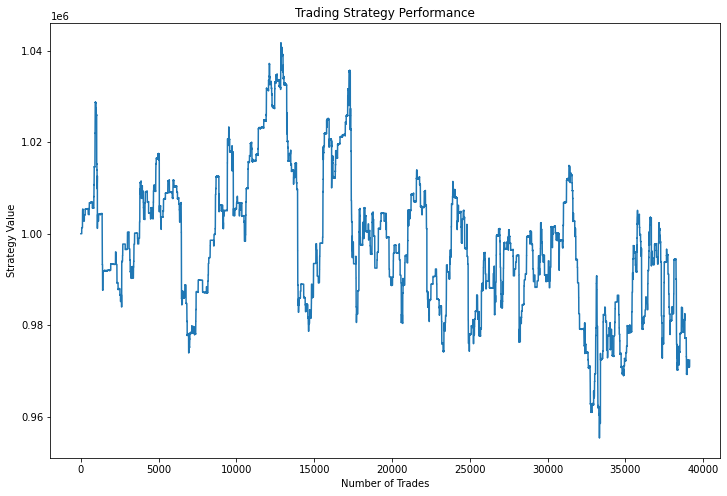

In [4]:
strategy.plot_results()